<a href="https://colab.research.google.com/github/PusHiiz/Sales_Amazon_Report/blob/main/Project_Sales_Amazon_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Project Analysis Amazon Sale Report

## Load Data
---------------------------
- Load data all necessary files
- Preview data shape and basic info

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import datetime
from datetime import datetime
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Amazon Sale Report.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Project/Sale Report.csv')

<ipython-input-3-8d7c700e639f>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Project/Amazon Sale Report.csv')


### Preview data

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9271 non-null   int64  
 1   SKU Code    9188 non-null   object 
 2   Design No.  9235 non-null   object 
 3   Stock       9235 non-null   float64
 4   Category    9226 non-null   object 
 5   Size        9235 non-null   object 
 6   Color       9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB


,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


In [ ]:
print(type(df))
print(type(df2))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## Test
- Sandbox

In [ ]:
df[["Order ID", "Date"]]

,Order ID,Date
0,405-8078784-5731545,04-30-22
1,171-9198151-1101146,04-30-22
2,404-0687676-7273146,04-30-22
3,403-9615377-8133951,04-30-22
4,407-1069790-7240320,04-30-22
...,...,...
128970,406-6001380-7673107,05-31-22
128971,402-9551604-7544318,05-31-22
128972,407-9547469-3152358,05-31-22
128973,402-6184140-0545956,05-31-22


In [ ]:
df.groupby('Order ID')['Amount'].sum().reset_index()

,Order ID,Amount
0,171-0000547-8192359,301.0
1,171-0000902-4490745,544.0
2,171-0001409-6228339,422.0
3,171-0003082-5110755,563.0
4,171-0003738-2052324,379.0
...,...,...
120373,S02-9578181-3610412,0.0
120374,S02-9599483-2736812,0.0
120375,S02-9649067-3246849,0.0
120376,S02-9736323-0094708,0.0


In [ ]:
# Top 10 ยอดขายต่อ Order
df.groupby('Order ID')['Amount'].sum().sort_values(ascending=False).head(10)

,Amount
Order ID,
408-3363121-6123562,8636.0
405-8750647-4224357,8081.0
403-4288285-8521928,6993.0
404-9932919-6662730,6832.0
408-3317403-1729937,6680.0
408-4410167-4971567,6536.0
405-4755854-9568304,6535.0
406-9002076-4152331,6509.0
171-0706521-2133101,6313.0


In [ ]:
df.groupby('Status')['Amount'].sum()

,Amount
Status,
Cancelled,6919284.3
Pending,430271.0
Pending - Waiting for Pick Up,192138.0
Shipped,50324255.0
Shipped - Damaged,1136.0
Shipped - Delivered to Buyer,18650815.0
Shipped - Lost in Transit,1997.0
Shipped - Out for Delivery,26971.0
Shipped - Picked Up,661252.0


## Data Profiling
- Amazon sale report

### Order ID

In [ ]:
df.dtypes

,0
index,int64
Order ID,object
Date,object
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Style,object
SKU,object
Category,object


In [ ]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [ ]:
df.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,403-4984515-8861958,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [ ]:
df.isnull().mean()*100

,0
index,0.000000
order_id,0.000000
date,0.000000
status,0.000000
fulfilment,0.000000
sales_channel_,0.000000
ship_service_level,0.000000
style,0.000000
sku,0.000000
category,0.000000


In [ ]:
# filter ตรวจดูว่า status cancelled ส่วนใหญ่เป็นค่า NaN ไหม
df[df['Status'] == 'Cancelled']

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
23,23,404-6019946-2909948,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,Set,...,INR,570.48,pune,MAHARASHTRA,411044.0,IN,NaN,False,Easy Ship,NaN
29,29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,...,NaN,NaN,GUWAHATI,ASSAM,781003.0,IN,NaN,False,Easy Ship,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128961,128961,402-0082204-6323568,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-A-XL,Western Dress,...,INR,771.00,Junagadh,Gujarat,362001.0,IN,NaN,False,NaN,False
128962,128962,408-9803724-6565965,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,MEN5024,MEN5024-KR-L,kurta,...,INR,665.00,MUMBAI,MAHARASHTRA,400056.0,IN,NaN,False,NaN,False
128965,128965,408-5154281-4593912,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,J0119,J0119-TP-XXXL,Top,...,INR,574.00,Prayagraj (ALLAHABAD),UTTAR PRADESH,211007.0,IN,NaN,False,NaN,False
128967,128967,404-5182288-1653947,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3638,JNE3638-KR-XS,kurta,...,NaN,NaN,Kolkata,WEST BENGAL,700040.0,IN,NaN,False,NaN,False


In [ ]:
# ดูจำนวนค่าซ้ำใน Order ID
## ลบแถวแรกออก นับซ้ำทั้งหมดที่เหลือทุกแถว
### ขั้นตอนคือมันจะตัดแถวแรกที่ซ้ำกันออก และนับซ้ำทั้งหมดที่เหลือทุกแถว
#### ตัวอย่าง A A A ตัด A ตัวแรกออกเหลือ A A เท่ากับจำนวน A คือ 2
df['Order ID'].duplicated().sum()

np.int64(8597)

In [ ]:
# ดูค่าซ้ำกันใน Order ID ว่ามี ID ไหนบ้าง
df['Order ID'][df['Order ID'].duplicated()]

,Order ID
38,403-4367956-2849158
62,404-2262140-4696366
80,408-4069830-3819562
81,408-4069830-3819562
106,405-5257740-5301158
...,...
128874,405-4724097-1016369
128908,403-6757403-6097100
128930,407-8519205-5064368
128942,403-3035549-4142738


In [ ]:
df['Order ID'].unique()

array(['405-8078784-5731545', '171-9198151-1101146',
       '404-0687676-7273146', ..., '407-9547469-3152358',
       '402-6184140-0545956', '408-7436540-8728312'], dtype=object)

In [ ]:
# ดูจำนวน unique value ใน Order ID
df['Order ID'].nunique()

120378

In [ ]:
df['Order ID'].value_counts()

,count
Order ID,
403-4984515-8861958,12
171-5057375-2831560,12
403-0173977-3041148,11
404-9932919-6662730,11
408-3317403-1729937,10
...,...
406-7498475-4257161,1
402-2493916-3621929,1
408-5687433-7844314,1


In [ ]:
# ลบแถวแรกออก นับค่าซ้ำทั้งหมดแค่ 1 แถว
## ขั้นตอนคือมันจะนับรวมแถวก่อน แล้วค่อยดูว่าการรวมของแถวไหนมีค่ามากกว่า 1 ก็เอานับจำนวนนั้น
### ตัวอย่าง A A A มันจะรวมกันเป็น A=3 และก็มาดูการรวมของ A>1 ไหม A=3 มากกว่า 1 ก็นับเป็น 1 จำนวนนับ
df['Order ID'].value_counts()[df['Order ID'].value_counts() >1]

,count
Order ID,
403-4984515-8861958,12
171-5057375-2831560,12
403-0173977-3041148,11
404-9932919-6662730,11
408-3317403-1729937,10
...,...
404-4178459-5526722,2
407-4164423-1997924,2
171-8387412-0694763,2


In [ ]:
# ลบแถวแรกออก นับค่าซ้ำทั้งหมดแค่ 1 แถว
## วิธีเดียวกับ value_counts >1
df['Order ID'].value_counts().loc[lambda x: x > 1]

,count
Order ID,
403-4984515-8861958,12
171-5057375-2831560,12
403-0173977-3041148,11
404-9932919-6662730,11
408-3317403-1729937,10
...,...
404-4178459-5526722,2
407-4164423-1997924,2
171-8387412-0694763,2


In [ ]:
# ดูแถวที่ซ้ำกัน (รวมแถวแรกด้วย) โดยใช้ .duplicate
## จะเห็นได้ว่า ใช้ .duplicate ได้ 8597 (ลบแถวแรกออก นับซ้ำทั้งหมดที่เหลือทุกแถว) + value_counts > 1 ได้ 6846 (ลบแถวแรกออก นับค่าซ้ำทั้งหมดแค่ 1 แถว)
duplicate_ids = df['Order ID'][df['Order ID'].duplicated()]
df[df['Order ID'].isin(duplicate_ids)]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
37,37,403-4367956-2849158,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3787,JNE3787-KR-S,kurta,...,INR,487.0,NEW DELHI,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
38,38,403-4367956-2849158,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3543,JNE3543-KR-S,kurta,...,INR,368.0,NEW DELHI,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
61,61,404-2262140-4696366,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE2270,JNE2270-KR-487-A-M,kurta,...,INR,518.0,NAGPUR,MAHARASHTRA,440022.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
62,62,404-2262140-4696366,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3579,JNE3579-KR-M,kurta,...,INR,295.0,NAGPUR,MAHARASHTRA,440022.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
79,79,408-4069830-3819562,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET288,SET288-KR-NP-XXXL,Set,...,INR,684.0,Kolkata,WEST BENGAL,700048.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128930,128930,407-8519205-5064368,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET324,SET324-KR-NP-XL,Set,...,INR,635.0,VIJAYAWADA,ANDHRA PRADESH,520010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128941,128941,403-3035549-4142738,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0118,J0118-TP-XXL,Top,...,INR,529.0,BENGALURU,KARNATAKA,560102.0,IN,NaN,False,NaN,False
128942,128942,403-3035549-4142738,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-XXL,Top,...,INR,518.0,BENGALURU,KARNATAKA,560102.0,IN,NaN,False,NaN,False
128952,128952,404-8878574-4524358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3721,JNE3721-KR-M,kurta,...,INR,301.0,Rishra Hooghly,WEST BENGAL,712249.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [ ]:
# ดูแถวที่ซ้ำกัน (รวมแถวแรกด้วย) โดยใช้ lambda
dup_ids = df['Order ID'].value_counts()[lambda x: x > 1].index
df[df['Order ID'].isin(dup_ids)]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
37,37,403-4367956-2849158,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3787,JNE3787-KR-S,kurta,...,INR,487.0,NEW DELHI,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
38,38,403-4367956-2849158,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3543,JNE3543-KR-S,kurta,...,INR,368.0,NEW DELHI,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
61,61,404-2262140-4696366,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE2270,JNE2270-KR-487-A-M,kurta,...,INR,518.0,NAGPUR,MAHARASHTRA,440022.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
62,62,404-2262140-4696366,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3579,JNE3579-KR-M,kurta,...,INR,295.0,NAGPUR,MAHARASHTRA,440022.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
79,79,408-4069830-3819562,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET288,SET288-KR-NP-XXXL,Set,...,INR,684.0,Kolkata,WEST BENGAL,700048.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128930,128930,407-8519205-5064368,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET324,SET324-KR-NP-XL,Set,...,INR,635.0,VIJAYAWADA,ANDHRA PRADESH,520010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128941,128941,403-3035549-4142738,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0118,J0118-TP-XXL,Top,...,INR,529.0,BENGALURU,KARNATAKA,560102.0,IN,NaN,False,NaN,False
128942,128942,403-3035549-4142738,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-XXL,Top,...,INR,518.0,BENGALURU,KARNATAKA,560102.0,IN,NaN,False,NaN,False
128952,128952,404-8878574-4524358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3721,JNE3721-KR-M,kurta,...,INR,301.0,Rishra Hooghly,WEST BENGAL,712249.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [ ]:
# filter ดูว่าซ้ำกันจริงไหม
df[df['Order ID'] == '403-4367956-2849158']

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
37,37,403-4367956-2849158,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3787,JNE3787-KR-S,kurta,...,INR,487.0,NEW DELHI,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
38,38,403-4367956-2849158,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3543,JNE3543-KR-S,kurta,...,INR,368.0,NEW DELHI,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN


In [ ]:
df.groupby('Order ID').sum().describe().reset_index()

,level_0,index,Qty,Amount,ship-postal-code,B2B
0,count,120378.000000,120378.000000,120378.000000,1.203780e+05,120378.000000
1,mean,69092.448994,0.969023,652.882406,4.969740e+05,0.007236
2,std,47052.007469,0.465294,393.975078,2.667553e+05,0.093159
3,min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
4,25%,33167.250000,1.000000,432.000000,3.900020e+05,0.000000
5,50%,66385.500000,1.000000,607.000000,5.000560e+05,0.000000
6,75%,99764.750000,1.000000,799.000000,6.001170e+05,0.000000
7,max,895086.000000,15.000000,8636.000000,7.200528e+06,4.000000


In [ ]:
# มีการสั่งซื้อทั้งหมดกี่ order
df['Order ID'].nunique()

120378

In [ ]:
# กรองเฉพาะค่าที่เจอครั้งเดียวเท่านั้น คือ Order ID ที่มีสินค้าเดียว
df[df['Order ID'].duplicated(keep=False) == False]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


## Data Cleaning

### Rename columns

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [ ]:
col_names = list(df.columns)

In [ ]:
col_names

['index',
 'Order ID',
 'Date',
 'Status',
 'Fulfilment',
 'Sales Channel ',
 'ship-service-level',
 'Style',
 'SKU',
 'Category',
 'Size',
 'ASIN',
 'Courier Status',
 'Qty',
 'currency',
 'Amount',
 'ship-city',
 'ship-state',
 'ship-postal-code',
 'ship-country',
 'promotion-ids',
 'B2B',
 'fulfilled-by',
 'Unnamed: 22']

In [ ]:
clean_col_neames = [name.lower().replace(" ","_").replace("-","_") for name in col_names]

In [ ]:
clean_col_neames

['index',
 'order_id',
 'date',
 'status',
 'fulfilment',
 'sales_channel_',
 'ship_service_level',
 'style',
 'sku',
 'category',
 'size',
 'asin',
 'courier_status',
 'qty',
 'currency',
 'amount',
 'ship_city',
 'ship_state',
 'ship_postal_code',
 'ship_country',
 'promotion_ids',
 'b2b',
 'fulfilled_by',
 'unnamed:_22']

In [ ]:
df.columns = clean_col_neames

In [ ]:
df.head()

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


### Change Type date

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%y')

In [ ]:
df.dtypes

,0
index,int64
order_id,object
date,datetime64[ns]
status,object
fulfilment,object
sales_channel_,object
ship_service_level,object
style,object
sku,object
category,object


In [ ]:
# ดูวันเริ่มต้น และวันสุดท้าย
print("Start date:",df['date'].min())
print("End date:",df['date'].max())

Start date: 2022-03-31 00:00:00
End date: 2022-06-29 00:00:00


In [ ]:
# ดูรายละเอียด date โดยรวม
print(df['date'].describe())

count                           128975
mean     2022-05-12 11:49:27.951928576
min                2022-03-31 00:00:00
25%                2022-04-20 00:00:00
50%                2022-05-10 00:00:00
75%                2022-06-04 00:00:00
max                2022-06-29 00:00:00
Name: date, dtype: object


In [ ]:
# ดูแบบภาพรวม
df_sorted = df.sort_values('date')

# ดูวันเริ่มต้น
print("Start date:")
print(df_sorted.head(1))

# ดูวันสิ้นสุด
print("End date:")
print(df_sorted.tail(1))

Start date:
       index             order_id       date                        status  \
48970  48970  404-1445673-1345134 2022-03-31  Shipped - Delivered to Buyer   

      fulfilment sales_channel_ ship_service_level    style           sku  \
48970   Merchant      Amazon.in           Standard  JNE3724  JNE3724-KR-L   

      category  ... currency amount ship_city   ship_state ship_postal_code  \
48970    kurta  ...      INR  495.0   KOLKATA  WEST BENGAL         700124.0   

       ship_country                                      promotion_ids    b2b  \
48970            IN  Amazon PLCC Free-Financing Universal Merchant ...  False   

       fulfilled_by unnamed:_22  
48970     Easy Ship         NaN  

[1 rows x 24 columns]
End date:
       index             order_id       date   status fulfilment  \
91816  91816  407-7086506-4532360 2022-06-29  Pending     Amazon   

      sales_channel_ ship_service_level    style            sku category  ...  \
91816      Amazon.in          Exped

## Data Profiling After Cleaning

### status

In [ ]:
df['status'].describe()

,status
count,128975
unique,13
top,Shipped
freq,77804


In [ ]:
# เช็คดูว่า status แบบไหนบ้าง แต่ละกลุ่มมีจำนวนเท่าไร
df['status'].value_counts()

,count
status,
Shipped,77804
Shipped - Delivered to Buyer,28769
Cancelled,18332
Shipped - Returned to Seller,1953
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


In [ ]:
# เช็คดูว่า status แบบไหนบ้าง แต่ละกลุ่มมีจำนวนเท่าไร
df.groupby('status')['status'].count()

,status
status,
Cancelled,18332
Pending,658
Pending - Waiting for Pick Up,281
Shipped,77804
Shipped - Damaged,1
Shipped - Delivered to Buyer,28769
Shipped - Lost in Transit,5
Shipped - Out for Delivery,35
Shipped - Picked Up,973


### fulfilment

In [ ]:
df['fulfilment'].describe()

,fulfilment
count,128975
unique,2
top,Amazon
freq,89698


In [ ]:
# เช็คดูว่า fulfilment แบบไหนบ้าง แต่ละกลุ่มมีจำนวนเท่าไร
df['fulfilment'].value_counts()

,count
fulfilment,
Amazon,89698
Merchant,39277


### sales_channel_

In [ ]:
df['sales_channel_'].describe()

,sales_channel_
count,128975
unique,2
top,Amazon.in
freq,128851


In [ ]:
# เช็คดูว่า sales_channel_ แบบไหนบ้าง แต่ละกลุ่มมีจำนวนเท่าไร
df['sales_channel_'].value_counts()

,count
sales_channel_,
Amazon.in,128851
Non-Amazon,124


### ship_service_level

In [ ]:
df['ship_service_level'].describe()

,ship_service_level
count,128975
unique,2
top,Expedited
freq,88615


In [ ]:
# เช็คดูว่า sales_channel_ แบบไหนบ้าง แต่ละกลุ่มมีจำนวนเท่าไร
df.groupby('ship_service_level')['ship_service_level'].count()

,ship_service_level
ship_service_level,
Expedited,88615
Standard,40360


In [ ]:
# หรือใช้แบบนี้ก็ได้ สั้นกว่า
df['ship_service_level'].value_counts()

,count
ship_service_level,
Expedited,88615
Standard,40360


### style

In [ ]:
df['style'].describe()

,style
count,128975
unique,1377
top,JNE3797
freq,4224


In [ ]:
df['style'].value_counts()

,count
style,
JNE3797,4224
JNE3405,2263
J0230,1868
SET268,1860
J0341,1630
...,...
SAR097,1
SET234,1
SET066,1


In [ ]:
# ดูค่าที่ซ้ำกัน (นับแค่ 1 ครั้ง) เพื่ออยากรู้ว่าจำนวนมีเท่าไร จะเห็นได้ว่าสไตล์สินค้าถูกกระจายซื้อเยอะมาก
df['style'].value_counts()[df['style'].value_counts() > 1]

,count
style,
JNE3797,4224
JNE3405,2263
J0230,1868
SET268,1860
J0341,1630
...,...
NW023,2
JNE2293,2
BL010,2


In [ ]:
# สไตล์สินค้าที่ถูกซื้อแค่ครั้งเดียว ไม่ถูกซื้อซ้ำ
df['style'].value_counts()[df['style'].value_counts() == 1]

,count
style,
SAR059,1
SAR030,1
J0052,1
SET022,1
SAR028,1
...,...
SAR097,1
SET234,1
SET066,1


In [ ]:
style_more_one = df['style'].value_counts()[df['style'].value_counts() > 1].count()

In [ ]:
style_equal_one = df['style'].value_counts()[df['style'].value_counts() == 1].count()

### Function proportion
เช็คสัดส่วนการซื้อต่อ order มากกว่า 1 สินค้า กับซื้อแค่สินค้าเดียวต่อ order

In [ ]:
def proportion(more_one, equal_one):
    total = more_one + equal_one
    result_more_one = more_one / total
    result_equal_one = equal_one / total

    print(f"✅ Orders with >1 item: {result_more_one:.2%}")
    print(f"📦 Orders with only 1 item: {result_equal_one:.2%}")

In [ ]:
proportion(style_more_one, style_equal_one)

✅ Orders with >1 item: 91.50%
📦 Orders with only 1 item: 8.50%


### sku

In [ ]:
df['sku'].describe()

,sku
count,128975
unique,7195
top,JNE3797-KR-L
freq,773


In [ ]:
df['sku'].value_counts()

,count
sku,
JNE3797-KR-L,773
JNE3797-KR-M,657
JNE3797-KR-S,587
JNE3405-KR-L,535
J0230-SKD-M,507
...,...
JNE3663-TP-L,1
JNE3625-DR-XL,1
PJNE3439-KR-N-6XL,1


In [ ]:
# ดูค่าที่ซ้ำกัน (นับแค่ 1 ครั้ง) เพื่ออยากรู้ว่าจำนวนมีเท่าไร จะเห็นได้ว่าสินค้าถูกกระจายซื้อเยอะมาก
df['sku'].value_counts()[df['sku'].value_counts() > 1]

,count
sku,
JNE3797-KR-L,773
JNE3797-KR-M,657
JNE3797-KR-S,587
JNE3405-KR-L,535
J0230-SKD-M,507
...,...
J0417-TP-M,2
J0137-SET-M,2
SAR173,2


In [ ]:
# สินค้าที่ถูกซื้อแค่ครั้งเดียว ไม่ถูกซื้อซ้ำ
df['sku'].value_counts()[df['sku'].value_counts() == 1]

,count
sku,
JNE2251-KR-537-C-XL,1
SET247-KR-SHA-XXXL,1
JNE3234-KR-M,1
BL087-L,1
J0034-SET-S,1
...,...
JNE3663-TP-L,1
JNE3625-DR-XL,1
PJNE3439-KR-N-6XL,1


In [ ]:
sku_more_one = df['sku'].value_counts()[df['sku'].value_counts() > 1].count()
sku_equal_one = df['sku'].value_counts()[df['sku'].value_counts() == 1].count()

In [ ]:
proportion(sku_more_one, sku_equal_one)

✅ Orders with >1 item: 87.59%
📦 Orders with only 1 item: 12.41%


In [ ]:
df['sku'].value_counts().head(10)

,count
sku,
JNE3797-KR-L,773
JNE3797-KR-M,657
JNE3797-KR-S,587
JNE3405-KR-L,535
J0230-SKD-M,507
JNE3797-KR-XL,474
J0230-SKD-S,452
JNE3405-KR-S,443
JNE3797-KR-XS,431


### category

In [ ]:
df['category'].describe()

,category
count,128975
unique,9
top,Set
freq,50284


In [ ]:
df['category'].value_counts()

,count
category,
Set,50284
kurta,49877
Western Dress,15500
Top,10622
Ethnic Dress,1159
Blouse,926
Bottom,440
Saree,164
Dupatta,3


In [ ]:
df['category'].value_counts()[df['category'].value_counts() > 1]

,count
category,
Set,50284
kurta,49877
Western Dress,15500
Top,10622
Ethnic Dress,1159
Blouse,926
Bottom,440
Saree,164
Dupatta,3


In [ ]:
df['category'].value_counts()[df['category'].value_counts() == 1]

,count
category,


### size

In [ ]:
df['size'].describe()

,size
count,128975
unique,11
top,M
freq,22711


In [ ]:
df['size'].value_counts()

,count
size,
M,22711
L,22132
XL,20876
XXL,18096
S,17090
3XL,14816
XS,11161
6XL,738
5XL,550


In [ ]:
df['size'].value_counts()[df['size'].value_counts() > 1]

,count
size,
M,22711
L,22132
XL,20876
XXL,18096
S,17090
3XL,14816
XS,11161
6XL,738
5XL,550


In [ ]:
df['size'].value_counts()[df['size'].value_counts() == 1]

,count
size,


### asin

In [ ]:
df['asin'].describe()

,asin
count,128975
unique,7190
top,B09SDXFFQ1
freq,773


In [ ]:
df['asin'].value_counts()

,count
asin,
B09SDXFFQ1,773
B09SDY8DCT,657
B09SDYQ3WG,587
B081WSCKPQ,535
B08XNJG8B1,507
...,...
B085GB5K1X,1
B09Y26JY2N,1
B09Y1T52JH,1


In [ ]:
df['asin'].value_counts()[df['asin'].value_counts() > 1]

,count
asin,
B09SDXFFQ1,773
B09SDY8DCT,657
B09SDYQ3WG,587
B081WSCKPQ,535
B08XNJG8B1,507
...,...
B081WY9B3W,2
B08MYR146S,2
B099NQC92Z,2


In [ ]:
df['asin'].value_counts()[df['asin'].value_counts() == 1]

,count
asin,
B07N81TFNY,1
B08TZYVPHV,1
B0922SZYFV,1
B09K3XJ5RT,1
B094FPVJQ8,1
...,...
B085GB5K1X,1
B09Y26JY2N,1
B09Y1T52JH,1


In [ ]:
asin_more_one = df['asin'].value_counts()[df['asin'].value_counts() > 1].count()
asin_equal_one = df['asin'].value_counts()[df['asin'].value_counts() == 1].count()

In [ ]:
proportion(asin_more_one, asin_equal_one)

✅ Orders with >1 item: 87.62%
📦 Orders with only 1 item: 12.38%


### courier_status

In [ ]:
df['courier_status'].describe()

,courier_status
count,122103
unique,3
top,Shipped
freq,109487


In [ ]:
df['courier_status'].value_counts()

,count
courier_status,
Shipped,109487
Unshipped,6681
Cancelled,5935


### qty
- จากการตรวจสอบคอลัมน์ `qty`:
  - 75% ของข้อมูล มีจำนวนการซื้อสินค้าเท่ากับ 1 ชิ้น
  - มีค่า min = 0 ซึ่งอาจแสดงถึงการยกเลิกสินค้า
  - ค่า mean ≈ 0.9 ต่ำกว่า median (1.0) บ่งชี้ว่ามี outlier ที่ 0 จำนวนหนึ่ง
  - ค่า max = 15 แสดงถึงบางรายการที่มีการสั่งซื้อจำนวนมาก
  - Distribution มีลักษณะเบ้ขวา (Right-skewed)

In [ ]:
df['qty'].describe()

,qty
count,128975.000000
mean,0.904431
std,0.313354
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [ ]:
# 0 น่าจะเป็นรายการที่ cancelled
df['qty'].value_counts()

,count
qty,
1,115780
0,12807
2,341
3,32
4,9
5,2
9,1
15,1
13,1


In [ ]:
# ค่า max
df['qty'].quantile(1)

np.float64(15.0)

In [ ]:
# ค่า median
df['qty'].quantile(0.50)

np.float64(1.0)

### currency

In [ ]:
df['currency'].describe()

,currency
count,121180
unique,1
top,INR
freq,121180


In [ ]:
df['currency'].value_counts()

,count
currency,
INR,121180


In [ ]:
df['currency'].isnull().sum()

np.int64(7795)

In [ ]:
df['currency'].isna().sum()

np.int64(7795)

In [ ]:
# missing value 6.04%
df['currency'].isnull().mean()*100

np.float64(6.043806939329328)

### amount
- จากการตรวจสอบคอลัมน์ `amount`:
  - มีค่า NaN อยู่ทื่ 7795 records อาจเกิดจากรายการที่ status cancelled
  - mean 648.561465 ค่าใกล้เคียงกับ median เกือบเป็น normal distribution
  - std 281.211687 กราฟกระจายตัวต่ำ std < mean
  - มีค่า min = 0 ซึ่งอาจแสดงถึงการยกเลิกสินค้า
  - ค่า 25% ของข้อมูลส่วนใหญ่ผลรวมการซื้ออยู่ที่ 449
  - ค่า 50% (median) ของข้อมูลส่วนใหญ่ผลรวมการซื้ออยู่ที่ 605 ใกล้เคียง mean
  - ค่า mean 648.561465 ค่าใกล้เคียงกับ median เกือบเป็น normal distribution
  - 75% ของข้อมูลส่วนใหญ่ผลรวมการซื้ออยู่ที่ 788
  - จากข้อมูล 25% 50% 75% สรุปได้ว่าข้อมูลกระจุกตัวอยู่ในช่วงกลาง (รอบ ๆ mean)
  - ค่า max = 5584.0 ผลรวมจำนวนเงินเยอะที่สุด คิดว่าเป็น outlier น่าจะมาจากสิน 15 ชิ้น ที่ซื้อรวมแน่ ๆ (เช็คแล้วไม่ใช่ มาจาก 8 ชิ้น)
  - Distribution มีลักษณะเบ้ซ้ายนิด ๆ เกือบจะเป็น Normal Distribution โดยสมบูรณ์ mean = median
  - ควรสร้าง column ราคาสินค้าต่อหน่วยเพิ่ม amount/qty เพื่อดูการกระจายตัวของราคา

In [ ]:
df['amount'].describe()

,amount
count,121180.000000
mean,648.561465
std,281.211687
min,0.000000
25%,449.000000
50%,605.000000
75%,788.000000
max,5584.000000


In [ ]:
df['amount'].value_counts()

,count
amount,
399.00,5442
771.00,2797
735.00,2436
0.00,2343
487.00,2293
...,...
1210.00,1
505.71,1
502.86,1


In [ ]:
df['amount'].isnull().sum()

np.int64(7795)

In [ ]:
df['amount'].isna().sum()

np.int64(7795)

<Axes: xlabel='amount', ylabel='Count'>

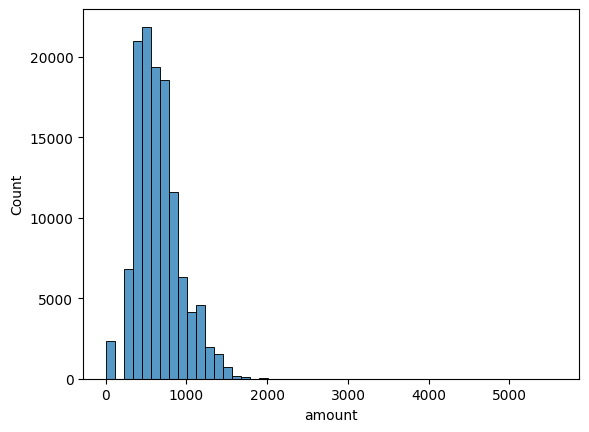

In [ ]:
sns.histplot(df['amount'], bins=50)

### Add column unit_price
เพิ่มขึ้นเพื่อหาราคาสินค้าที่แพงที่สุด และถูกที่สุด

In [ ]:
df['unit_price'] = df['amount'] / df['qty']

In [ ]:
df.drop(columns=['unitprice'], inplace=True)

KeyError: "['unitprice'] not found in axis"

In [ ]:
df.head()

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,unit_price
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,inf
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,406.0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,329.0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,inf
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN,574.0


In [ ]:
df[['amount', 'qty', 'unit_price']]

,amount,qty,unit_price
0,647.62,0,inf
1,406.00,1,406.0
2,329.00,1,329.0
3,753.33,0,inf
4,574.00,1,574.0
...,...,...,...
128970,517.00,1,517.0
128971,999.00,1,999.0
128972,690.00,1,690.0
128973,1199.00,1,1199.0


In [ ]:
df['unit_price'].describe()

,unit_price
count,121180.0
mean,inf
std,NaN
min,0.0
25%,458.0
50%,626.0
75%,818.0
max,inf


In [ ]:
# แทน inf เป็น NaN
df['unit_price'] = df['unit_price'].replace(np.inf, np.nan)

In [ ]:
df['unit_price'].describe()

,unit_price
count,116044.000000
mean,647.517554
std,278.523508
min,0.000000
25%,449.000000
50%,600.500000
75%,788.000000
max,2598.000000


In [ ]:
df['unit_price'].value_counts()

,count
unit_price,
399.0,5461
771.0,2805
735.0,2442
0.0,2343
487.0,2301
...,...
1270.0,1
707.0,1
1670.0,1


In [ ]:
df['unit_price'].isnull().sum()

np.int64(12931)

In [ ]:
df['unit_price'].isnull().value_counts()

,count
unit_price,
False,116044
True,12931


<Axes: >

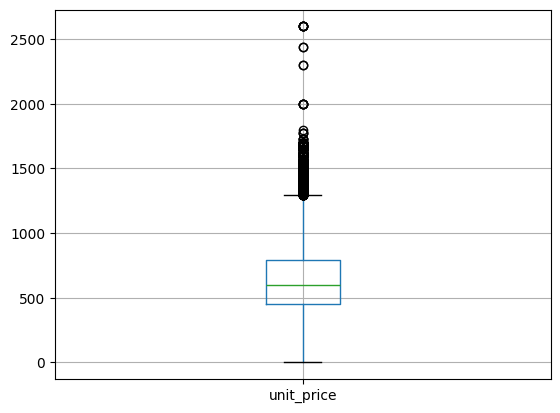

In [ ]:
df.boxplot(column='unit_price')

<Axes: xlabel='unit_price', ylabel='Count'>

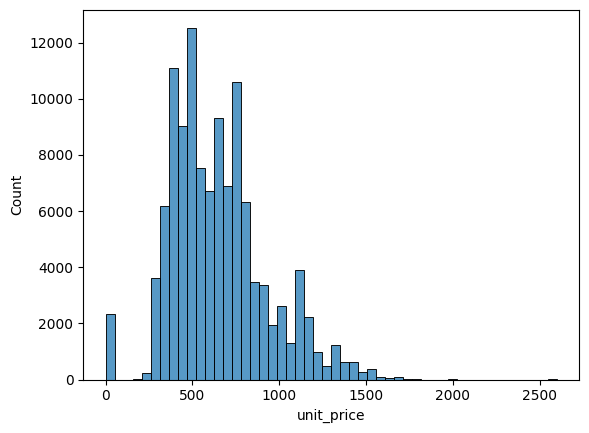

In [ ]:
sns.histplot(df['unit_price'], bins=50)

### ship_city

In [ ]:
df['ship_city'].describe()

,ship_city
count,128942
unique,8955
top,BENGALURU
freq,11217


In [ ]:
df['ship_city'].isnull().sum()

np.int64(33)

In [ ]:
df['ship_city'].isna().sum()

np.int64(33)

In [ ]:
# เช็คดูว่าสมมุติฐานถูกไหมที่คิดว่าค่า null มาจาก status Cancelled ทั้งหมด ซึ่งไม่เป็นความจริง
df[df['ship_city'].isnull()]['status'].value_counts()

,count
status,
Shipped,16
Cancelled,7
Shipped - Delivered to Buyer,7
Shipped - Returned to Seller,3


In [ ]:
# หรือจะเช็คด้วยวิธีนี้ก็ได้ ถ้าเป็นตามสมมุติฐานจะต้องเป็น cancelled ทั้งหมด ซึ่งไม่เป็นความจริง
df[df['ship_city'].isnull()]['status'].unique()

array(['Shipped', 'Cancelled', 'Shipped - Delivered to Buyer',
       'Shipped - Returned to Seller'], dtype=object)

In [ ]:
df['ship_city'].value_counts()

,count
ship_city,
BENGALURU,11217
HYDERABAD,8074
MUMBAI,6126
NEW DELHI,5795
CHENNAI,5421
...,...
shimoga,1
Bangluru,1
Dombiwali,1


In [ ]:
df['ship_city'].value_counts()[df['ship_city'].value_counts() > 1]

,count
ship_city,
BENGALURU,11217
HYDERABAD,8074
MUMBAI,6126
NEW DELHI,5795
CHENNAI,5421
...,...
VOLETIVARIPALEM,2
JAYPEE NAGAR,2
GAJAPATHINAGARAM,2


In [ ]:
df['ship_city'].value_counts()[df['ship_city'].value_counts() == 1]

,count
ship_city,
Halol,1
Amravati.,1
LIMLA,1
TALCHER THERMAL POWER STATION TOWNSHIP,1
PERIYA,1
...,...
shimoga,1
Bangluru,1
Dombiwali,1


In [ ]:
df['ship_city'].duplicated().sum()

np.int64(120019)

In [ ]:
ship_city_more_one = df['ship_city'].value_counts()[df['ship_city'].value_counts() > 1].count()
ship_city_equal_one = df['ship_city'].value_counts()[df['ship_city'].value_counts() == 1].count()

In [ ]:
proportion(ship_city_more_one, ship_city_equal_one)

✅ Orders with >1 item: 52.54%
📦 Orders with only 1 item: 47.46%


### ship_state

In [ ]:
df['ship_state'].describe()

,ship_state
count,128942
unique,69
top,MAHARASHTRA
freq,22260


In [ ]:
df['ship_state'].isnull().sum()

np.int64(33)

In [ ]:
df['ship_state'].isna().sum()

np.int64(33)

In [ ]:
df[df['ship_state'].isnull()]['status'].value_counts()

,count
status,
Shipped,16
Cancelled,7
Shipped - Delivered to Buyer,7
Shipped - Returned to Seller,3


In [ ]:
df[df['ship_state'].isnull()]['status'].unique()

array(['Shipped', 'Cancelled', 'Shipped - Delivered to Buyer',
       'Shipped - Returned to Seller'], dtype=object)

In [ ]:
df[df['ship_state'].isnull()]['courier_status'].value_counts()

,count
courier_status,
Shipped,26
Unshipped,2
Cancelled,2


In [ ]:
df['ship_state'].value_counts()[df['ship_state'].value_counts() > 1]

,count
ship_state,
MAHARASHTRA,22260
KARNATAKA,17326
TAMIL NADU,11483
TELANGANA,11330
UTTAR PRADESH,10638
DELHI,6782
KERALA,6585
WEST BENGAL,5963
ANDHRA PRADESH,5430


In [ ]:
df['ship_state'].value_counts()[df['ship_state'].value_counts() == 1]

,count
ship_state,
orissa,1
Puducherry,1
Punjab/Mohali/Zirakpur,1
APO,1
Pondicherry,1
AR,1
PB,1
Nagaland,1
Mizoram,1


In [ ]:
df['ship_state'].duplicated().sum()

np.int64(128905)

In [ ]:
ship_state_more_one = df['ship_state'].value_counts()[df['ship_state'].value_counts() > 1].count()
ship_state_equal_one = df['ship_state'].value_counts()[df['ship_state'].value_counts() == 1].count()

In [ ]:
proportion(ship_state_more_one, ship_state_equal_one)

✅ Orders with >1 item: 82.61%
📦 Orders with only 1 item: 17.39%


## Data Cleaning Again

### Change Type ship_postal_code
float64 to object
เพราะรหัสไปรษณีย์ไม่สามารถนำมาคำนวนได้ ถึงแม้จะเป็นตัวเลขก็ตาม

In [ ]:
df['ship_postal_code'] = df['ship_postal_code'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)

In [ ]:
df['ship_postal_code'].dtype

dtype('O')

## Data Profiling After Cleaning Again

### ship_postal_code

In [ ]:
df['ship_postal_code'].describe()

,ship_postal_code
count,128942
unique,9459
top,201301
freq,1006


In [ ]:
df['ship_postal_code'].value_counts()

,count
ship_postal_code,
201301,1006
122001,688
560037,632
560068,619
560076,581
...,...
636704,1
636204,1
670595,1


In [ ]:
df['ship_postal_code'].value_counts()[df['ship_postal_code'].value_counts() > 1]

,count
ship_postal_code,
201301,1006
122001,688
560037,632
560068,619
560076,581
...,...
844114,2
385320,2
124105,2


In [ ]:
df['ship_postal_code'].value_counts()[df['ship_postal_code'].value_counts() == 1]

,count
ship_postal_code,
629152,1
458775,1
535526,1
507211,1
496111,1
...,...
636704,1
636204,1
670595,1


In [ ]:
df['ship_postal_code'].isnull().sum()

np.int64(33)

In [ ]:
df[df['ship_postal_code'].isnull()]['status'].value_counts()

,count
status,
Shipped,16
Cancelled,7
Shipped - Delivered to Buyer,7
Shipped - Returned to Seller,3


In [ ]:
df['ship_postal_code'].duplicated().sum()

np.int64(119515)

In [ ]:
df['ship_postal_code'].nunique()

9459

In [ ]:
df['ship_country'].describe()

,ship_country
count,128942
unique,1
top,IN
freq,128942


In [ ]:
ship_postal_code_more_one = df['ship_postal_code'].value_counts()[df['ship_postal_code'].value_counts() > 1].count()
ship_postal_code_equal_one = df['ship_postal_code'].value_counts()[df['ship_postal_code'].value_counts() == 1].count()

In [ ]:
proportion(ship_postal_code_more_one, ship_postal_code_equal_one)

✅ Orders with >1 item: 72.30%
📦 Orders with only 1 item: 27.70%


### ship_country

In [ ]:
df['ship_country'].value_counts()

,count
ship_country,
IN,128942


In [ ]:
df['ship_country'].isnull().sum()

np.int64(33)

In [ ]:
df[df['ship_country'].isnull()]['status'].value_counts()

,count
status,
Shipped,16
Cancelled,7
Shipped - Delivered to Buyer,7
Shipped - Returned to Seller,3


In [ ]:
df[df['ship_country'].isnull()]['courier_status'].value_counts()

,count
courier_status,
Shipped,26
Unshipped,2
Cancelled,2


### promotion_ids

In [ ]:
df['promotion_ids'].describe()

,promotion_ids
count,79822
unique,5787
top,IN Core Free Shipping 2015/04/08 23-48-5-108
freq,46100


In [ ]:
df['promotion_ids'].value_counts()

,count
promotion_ids,
IN Core Free Shipping 2015/04/08 23-48-5-108,46100
Duplicated A12RHGVGRWOT3S 1560498941486,489
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-G5ZRX4BZOIODU,Amazon PLCC Free-Financing Universal Merchant AAT-PZHUW6DZX4BPS,Amazon PLCC Free-Financing Universal Merchant AAT-XX7G3ZRJJJ5LG,Amazon PLCC Free-Financing Universal Merchant AAT-LEHCKNDBJG64E,Amazon PLCC Free-Financing Universal Merchant AAT-DJVHCEV7D7RQY,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4",458
Duplicated AYTJSBA8ZOP16 1567159860988,433
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-G5ZRX4BZOIODU,Amazon PLCC Free-Financing Universal Merchant AAT-PZHUW6DZX4BPS,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4",316
...,...
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-EWAPBB6BDRGM6,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-WJNFN7RN4AM56,Amazon PLCC Free-Financing Universal Merchant AAT-KRZXHZ23VMAKE,Amazon PLCC Free-Financing Universal Merchant AAT-NT3ZJJGQ3JK3Q,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4",1
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-SL3Y2YRMAUNFC,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-EWAPBB6BDRGM6,Amazon PLCC Free-Financing Universal Merchant SS-1642583468532,Amazon PLCC Free-Fi

In [ ]:
df['promotion_ids'].value_counts()[df['promotion_ids'].value_counts() > 1]

,count
promotion_ids,
IN Core Free Shipping 2015/04/08 23-48-5-108,46100
Duplicated A12RHGVGRWOT3S 1560498941486,489
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-G5ZRX4BZOIODU,Amazon PLCC Free-Financing Universal Merchant AAT-PZHUW6DZX4BPS,Amazon PLCC Free-Financing Universal Merchant AAT-XX7G3ZRJJJ5LG,Amazon PLCC Free-Financing Universal Merchant AAT-LEHCKNDBJG64E,Amazon PLCC Free-Financing Universal Merchant AAT-DJVHCEV7D7RQY,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4",458
Duplicated AYTJSBA8ZOP16 1567159860988,433
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-G5ZRX4BZOIODU,Amazon PLCC Free-Financing Universal Merchant AAT-PZHUW6DZX4BPS,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4",316
...,...
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-CXNSLNBROFDW4,Amazon PLCC Free-Financing Universal Merchant AAT-WSJLDN3X7KEMO,Amazon PLCC Free-Financing Universal Merchant AAT-VL6FGQVGQVXUS,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-G5ZRX4BZOIODU,Amazon PLCC Free-Financing Universal Merchant AAT-ACZIPIA37BFIY,Amazon PLCC Free-Financing Universal Merchant AAT-6PE7LSBGRLMV2,Amazon PLCC Free-Financing Universal Merchant AAT-4UKS7UWZY3AES,Amazon PLCC Free-Financing Universal Merchant AAT-PZHUW6DZX4BPS,Amazon PLCC Free-Financing Universal Merchant AAT-AWMMZNGS33JGQ,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4",2
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-F

In [ ]:
df['promotion_ids'].value_counts()[df['promotion_ids'].value_counts() == 1]

,count
promotion_ids,
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-EWAPBB6BDRGM6,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-5ZEB2OGNZ32MC,Amazon PLCC Free-Financing Universal Merchant AAT-TNYBHEAO7HOHO,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4,Amazon PLCC Free-Financing Universal Merchant AAT-QMFZ3M7T5NPDS,Amazon PLCC Free-Financing Universal Merchant #MP-pmilan-1601980554292",1
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-SL3Y2YRMAUNFC,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant SS-1640596961008,Amazon PLCC Free-Financing Universal Merchant AAT-EWAPBB6BDRGM6,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ME7D3ZA4R4KII,Amazon PLCC Free-Financing Universal Merchant AAT-6VIAPZUTINOWE,Amazon PLCC Free-Financing Universal Merchant AAT-TNYBHEAO7HOHO,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4,Amazon PLCC Free-Financing Universal Merchant AAT-QMFZ3M7T5NPDS,Amazon PLCC Free-Financing Universal Merchant #MP-pmilan-1601980554292",1
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-SL3Y2YRMAUNFC,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-EWAPBB6BDRGM6,Amazon PLCC Free-Financing Universal Merchant AAT-R7GXNZWISTRFA,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-TNYBHEAO7HOHO,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4,Amazon PLCC Free-Financing Universal Merchant AAT-QMFZ3M7T5NPDS,Amazon PLCC Free-Financing Universal Merchant #MP-pmilan-1601980554292",1
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Fin

In [ ]:
df['promotion_ids'].isnull().sum()

np.int64(49153)

In [ ]:
df['promotion_ids'].duplicated().sum()

np.int64(123187)

In [ ]:
df['promotion_ids'].nunique()

5787

In [ ]:
promotion_ids_more_one = df['promotion_ids'].value_counts()[df['promotion_ids'].value_counts() > 1].count()
promotion_ids_equal_one = df['promotion_ids'].value_counts()[df['promotion_ids'].value_counts() == 1].count()

In [ ]:
proportion(promotion_ids_more_one, promotion_ids_equal_one)

✅ Orders with >1 item: 53.02%
📦 Orders with only 1 item: 46.98%


### b2b

In [ ]:
df['b2b'].describe()

,b2b
count,128975
unique,2
top,False
freq,128104


In [ ]:
df['b2b'].value_counts()

,count
b2b,
False,128104
True,871


In [ ]:
df['b2b'].isnull().sum()

np.int64(0)

### fulfilled_by

In [ ]:
df['fulfilled_by'].describe()

,fulfilled_by
count,39277
unique,1
top,Easy Ship
freq,39277


In [ ]:
df['fulfilled_by'].value_counts()

,count
fulfilled_by,
Easy Ship,39277


In [ ]:
df['fulfilled_by'].isnull().sum()

np.int64(89698)

## Data Cleaning ship_to

### Data Quality Check
Data Cleaning & Missing Value Analysis

In [ ]:
# สร้างตัวกรองว่าแถวไหนมี missing ใน column ที่เราสงสัย
## .isnull() → เช็คว่าเป็น NaN ไหม
## .all(axis=1) → ต้องเป็น NaN ทุก column (ในกลุ่มที่เราสงสัย) พร้อมกัน
## missing_mask → เป็น True เฉพาะแถวที่มี NaN ทั้ง 4 column พร้อมกัน
missing_mask = df[['ship_city', 'ship_state', 'ship_postal_code', 'ship_country']].isnull().all(axis=1)

In [ ]:
df.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel_',
       'ship_service_level', 'style', 'sku', 'category', 'size', 'asin',
       'courier_status', 'qty', 'currency', 'amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'b2b', 'fulfilled_by', 'unnamed:_22', 'unit_price'],
      dtype='object')

In [ ]:
missing_mask.isnull().sum()

np.int64(0)

In [ ]:
missing_mask[0:5]

,0
0,False
1,False
2,False
3,False
4,False


In [ ]:
# ทำความเข้าใจ missing_mask
df[missing_mask]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,unit_price
1871,1871,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,...,493.0,NaN,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,493.0
1872,1872,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,...,458.0,NaN,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,458.0
8752,8752,406-4003386-8768363,2022-04-25,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,...,432.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,432.0
11215,11215,402-0107720-7057168,2022-04-23,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,654.0,NaN,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,654.0
13252,13252,407-4532637-8415521,2022-04-22,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,380.0,NaN,NaN,NaN,NaN,NaN,False,Easy Ship,NaN,NaN
15688,15688,404-9229894-8608305,2022-04-21,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,...,442.0,NaN,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,442.0
16787,16787,402-4919636-4333150,2022-04-20,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,...,376.0,NaN,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,376.0
18351,18351,405-4927647-8064368,2022-04-19,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XS,Set,...,1112.0,NaN,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,1112.0
22930,22930,402-8628677-0457954,2022-04-16,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,J0003,J0003-SET-S,Set,...,654.0,NaN,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,654.0
24986,24986,406-4079063-8291520,2022-04-15,Cancelled,Amazon,Amazon.in,Expedited,JNE3567,JNE3567-KR-XXL,kurta,...,399.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,399.0


In [ ]:
# เริ่มไล่หาว่ามี column ไหนไหมที่เป็น pattern เดียวกับ ship_to
# สุดท้ายก็ไปพบใน sales_chennel_
df[missing_mask][['sales_channel_']].value_counts()

,count
sales_channel_,
Amazon.in,33


In [ ]:
# แต่พอมาเช็คเห็นว่าค่าส่วนใหญ่เป็น Amazon.in อยู่แล้ว มันแค่น่าจะบังเอิญมาอยู่ใน 33 records ของ ship_to
df['sales_channel_'].value_counts()

,count
sales_channel_,
Amazon.in,128851
Non-Amazon,124


In [ ]:
# ตรวจไปเจออีก 1 column b2b
df[missing_mask][['b2b']].value_counts()

,count
b2b,
False,33


In [ ]:
# ก็เหมือนกรณี sales_channel_ มันน่าจะแค่บังเอิญ เพราะใน False เป็นค่าส่วนมาก
df['b2b'].value_counts()

,count
b2b,
False,128104
True,871


In [ ]:
# หากเราลองมาดึงดูพร้อมกัน ก็จะเห็นได้ว่ามี 33 records จริง ๆ แต่พอดูไส้ในอย่างที่ได้กล่าวข้างบนก็จะเห็นได้ว่าตรงนี้ไม่เกี่ยวข้องกันเลย
df[missing_mask][['sales_channel_', 'b2b']].value_counts()

,,count
sales_channel_,b2b,
Amazon.in,False,33


In [ ]:
# เลือก columns ทั้งหมด ยกเว้น ship_city, ship_state, ship_postal_code, ship_country มาเทียบกับ 33 records that missing
# ใช้ .drop() เพื่อตัด columns ที่ไม่ต้องการ
df[missing_mask].drop(columns=['ship_city', 'ship_state', 'ship_postal_code', 'ship_country'])

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,asin,courier_status,qty,currency,amount,promotion_ids,b2b,fulfilled_by,unnamed:_22,unit_price
1871,1871,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,...,B099S6795L,Shipped,1,INR,493.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,493.0
1872,1872,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,...,B09811Y7WM,Shipped,1,INR,458.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,458.0
8752,8752,406-4003386-8768363,2022-04-25,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,...,B082W7HW86,Shipped,1,INR,432.0,NaN,False,NaN,NaN,432.0
11215,11215,402-0107720-7057168,2022-04-23,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,B0894X27FC,Shipped,1,INR,654.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,654.0
13252,13252,407-4532637-8415521,2022-04-22,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,B081WX4G4Q,NaN,0,INR,380.0,NaN,False,Easy Ship,NaN,NaN
15688,15688,404-9229894-8608305,2022-04-21,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,...,B08WPR5MCB,Shipped,1,INR,442.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,442.0
16787,16787,402-4919636-4333150,2022-04-20,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,...,B07GPGP46N,Shipped,1,INR,376.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,376.0
18351,18351,405-4927647-8064368,2022-04-19,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XS,Set,...,B08XNHXSFZ,Shipped,1,INR,1112.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,1112.0
22930,22930,402-8628677-0457954,2022-04-16,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,J0003,J0003-SET-S,Set,...,B0894X27FC,Shipped,1,INR,654.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,654.0
24986,24986,406-4079063-8291520,2022-04-15,Cancelled,Amazon,Amazon.in,Expedited,JNE3567,JNE3567-KR-XXL,kurta,...,B08KRYCC8J,Unshipped,1,INR,399.0,NaN,False,NaN,NaN,399.0


In [ ]:
# ตัด column ที่ขึ้นต้นด้วย 'ship_'
# ลบ column ที่ไม่ต้องการมี prefix เหมือนกัน (เช่น ship_), ใช้ list comprehension เพื่อกรองชื่อ column
cols_to_keep = [col for col in df.columns if not col.startswith('ship_')]
df[missing_mask][cols_to_keep]

,index,order_id,date,status,fulfilment,sales_channel_,style,sku,category,size,asin,courier_status,qty,currency,amount,promotion_ids,b2b,fulfilled_by,unnamed:_22,unit_price
1871,1871,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,J0301,J0301-TP-L,Top,L,B099S6795L,Shipped,1,INR,493.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,493.0
1872,1872,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,JNE3697,JNE3697-KR-L,kurta,L,B09811Y7WM,Shipped,1,INR,458.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,458.0
8752,8752,406-4003386-8768363,2022-04-25,Shipped,Amazon,Amazon.in,JNE3376,JNE3376-KR-M,kurta,M,B082W7HW86,Shipped,1,INR,432.0,NaN,False,NaN,NaN,432.0
11215,11215,402-0107720-7057168,2022-04-23,Shipped,Amazon,Amazon.in,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,INR,654.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,654.0
13252,13252,407-4532637-8415521,2022-04-22,Cancelled,Merchant,Amazon.in,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,NaN,0,INR,380.0,NaN,False,Easy Ship,NaN,NaN
15688,15688,404-9229894-8608305,2022-04-21,Shipped,Amazon,Amazon.in,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Shipped,1,INR,442.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,442.0
16787,16787,402-4919636-4333150,2022-04-20,Shipped - Delivered to Buyer,Merchant,Amazon.in,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,3XL,B07GPGP46N,Shipped,1,INR,376.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,376.0
18351,18351,405-4927647-8064368,2022-04-19,Shipped,Amazon,Amazon.in,J0230,J0230-SKD-XS,Set,XS,B08XNHXSFZ,Shipped,1,INR,1112.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,1112.0
22930,22930,402-8628677-0457954,2022-04-16,Shipped - Returned to Seller,Merchant,Amazon.in,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,INR,654.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,654.0
24986,24986,406-4079063-8291520,2022-04-15,Cancelled,Amazon,Amazon.in,JNE3567,JNE3567-KR-XXL,kurta,XXL,B08KRYCC8J,Unshipped,1,INR,399.0,NaN,False,NaN,NaN,399.0


In [ ]:
cols_to_keep

['index',
 'order_id',
 'date',
 'status',
 'fulfilment',
 'sales_channel_',
 'style',
 'sku',
 'category',
 'size',
 'asin',
 'courier_status',
 'qty',
 'currency',
 'amount',
 'promotion_ids',
 'b2b',
 'fulfilled_by',
 'unnamed:_22',
 'unit_price']

In [ ]:
# เลือก columns ทั้งหมด มาเทียบกับ 33 records that missing
df[missing_mask][df.columns]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,unit_price
1871,1871,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,...,493.0,NaN,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,493.0
1872,1872,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,...,458.0,NaN,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,458.0
8752,8752,406-4003386-8768363,2022-04-25,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,...,432.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,432.0
11215,11215,402-0107720-7057168,2022-04-23,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,654.0,NaN,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,654.0
13252,13252,407-4532637-8415521,2022-04-22,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,380.0,NaN,NaN,NaN,NaN,NaN,False,Easy Ship,NaN,NaN
15688,15688,404-9229894-8608305,2022-04-21,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,...,442.0,NaN,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,442.0
16787,16787,402-4919636-4333150,2022-04-20,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,...,376.0,NaN,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,376.0
18351,18351,405-4927647-8064368,2022-04-19,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XS,Set,...,1112.0,NaN,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,1112.0
22930,22930,402-8628677-0457954,2022-04-16,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,J0003,J0003-SET-S,Set,...,654.0,NaN,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,654.0
24986,24986,406-4079063-8291520,2022-04-15,Cancelled,Amazon,Amazon.in,Expedited,JNE3567,JNE3567-KR-XXL,kurta,...,399.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,399.0


In [ ]:
# ลองดูหลาย ๆ column พร้อม ๆ กันก็ไม่พบ pattern
df[missing_mask][['order_id', 'date', 'fulfilment', 'sales_channel_']].value_counts()

,,,,count
order_id,date,fulfilment,sales_channel_,
405-5884153-9925116,2022-06-04,Amazon,Amazon.in,3
407-3064376-9158743,2022-04-08,Merchant,Amazon.in,2
404-0566904-4825137,2022-04-29,Amazon,Amazon.in,2
406-7680604-5439529,2022-05-11,Amazon,Amazon.in,2
402-1049475-3611523,2022-05-20,Amazon,Amazon.in,1
402-4919636-4333150,2022-04-20,Merchant,Amazon.in,1
402-8628677-0457954,2022-04-16,Merchant,Amazon.in,1
402-8651786-0683548,2022-05-04,Amazon,Amazon.in,1
171-3257610-9237139,2022-05-22,Merchant,Amazon.in,1


In [ ]:
# เช็คดูว่า NaN มีเฉพาะใน ship_ columns หรือมี NaN กระจายทั่ว dataset (อาจหมายถึงไฟล์ต้นทางมีปัญหา)
## courier_status, currency, fulfilled_by, amount หายด้วย อาจเป็นแถวที่ระบบสร้างไว้ แต่ยังไม่สมบูรณ์ (เช่น pending หรือถูก cancel ช่วงกลาง)
### currency, amount, courier_status จะเป็น NaN จากการ cancelled
df[missing_mask].isnull().sum()

,0
index,0
order_id,0
date,0
status,0
fulfilment,0
sales_channel_,0
ship_service_level,0
style,0
sku,0
category,0


In [ ]:
# หา pattern ซ้ำ ๆ ใน columns
# มีวันที่มั้ย (ถ้ามีแปลว่า record ถูกสร้างจริง)
# มีการใส่ยอดเงิน (amount) และสกุล (currency) หรือไม่ (cancelled มักจะไม่มี)
# ค่าที่หายซ้ำ ๆ เหมือนกันมั้ย (เช่น fulfilled_by หายเสมอ = ระบบยังไม่ได้ assign)

df[missing_mask][[
    'order_id', 'date', 'status', 'fulfilled_by', 'courier_status',
    'currency', 'amount', 'ship_service_level', 'sales_channel_',
    'b2b', 'promotion_ids', 'category', 'size'
]].sort_values(by='date')

,order_id,date,status,fulfilled_by,courier_status,currency,amount,ship_service_level,sales_channel_,b2b,promotion_ids,category,size
37964,407-3064376-9158743,2022-04-08,Cancelled,Easy Ship,NaN,INR,380.0,Standard,Amazon.in,False,NaN,kurta,S
37963,407-3064376-9158743,2022-04-08,Cancelled,Easy Ship,NaN,INR,380.0,Standard,Amazon.in,False,NaN,kurta,M
30379,404-7506843-7913132,2022-04-12,Shipped - Delivered to Buyer,Easy Ship,Shipped,INR,1299.0,Standard,Amazon.in,False,Amazon PLCC Free-Financing Universal Merchant ...,Set,L
24986,406-4079063-8291520,2022-04-15,Cancelled,NaN,Unshipped,INR,399.0,Expedited,Amazon.in,False,NaN,kurta,XXL
22930,402-8628677-0457954,2022-04-16,Shipped - Returned to Seller,Easy Ship,Shipped,INR,654.0,Standard,Amazon.in,False,Amazon PLCC Free-Financing Universal Merchant ...,Set,S
18351,405-4927647-8064368,2022-04-19,Shipped,NaN,Shipped,INR,1112.0,Expedited,Amazon.in,False,IN Core Free Shipping 2015/04/08 23-48-5-108,Set,XS
16787,402-4919636-4333150,2022-04-20,Shipped - Delivered to Buyer,Easy Ship,Shipped,INR,376.0,Standard,Amazon.in,False,Amazon PLCC Free-Financing Universal Merchant ...,kurta,3XL
15688,404-9229894-8608305,2022-04-21,Shipped,NaN,Shipped,INR,442.0,Expedited,Amazon.in,False,IN Core Free Shipping 2015/04/08 23-48-5-108,kurta,M
13252,407-4532637-8415521,2022-04-22,Cancelled,Easy Ship,NaN,INR,380.0,Standard,Amazon.in,False,NaN,kurta,S
11215,402-0107720-7057168,2022-04-23,Shipped,NaN,Shipped,INR,654.0,Expedited,Amazon.in,False,IN Core Free Shipping 2015/04/08 23-48-5-108,Set,S


In [ ]:
# ตรวจสอบว่ามีค่าใน shipping แต่ไม่มี ship_to
# df.loc[เงื่อนไขแถว, ['คอลัมน์ที่อยากดู']]
## df.loc[df['status'] == 'shipped', ['order_id', 'status', 'ship_city']]
df.loc[
    missing_mask & df['status'].notna() & df['amount'].notna(),
    ['order_id', 'status', 'amount', 'ship_service_level', 'courier_status']
]

,order_id,status,amount,ship_service_level,courier_status
1871,404-0566904-4825137,Shipped,493.0,Expedited,Shipped
1872,404-0566904-4825137,Shipped,458.0,Expedited,Shipped
8752,406-4003386-8768363,Shipped,432.0,Expedited,Shipped
11215,402-0107720-7057168,Shipped,654.0,Expedited,Shipped
13252,407-4532637-8415521,Cancelled,380.0,Standard,NaN
15688,404-9229894-8608305,Shipped,442.0,Expedited,Shipped
16787,402-4919636-4333150,Shipped - Delivered to Buyer,376.0,Standard,Shipped
18351,405-4927647-8064368,Shipped,1112.0,Expedited,Shipped
22930,402-8628677-0457954,Shipped - Returned to Seller,654.0,Standard,Shipped
24986,406-4079063-8291520,Cancelled,399.0,Expedited,Unshipped


In [ ]:
# สร้างตัวแปรที่เก็บ ทุก records ที่ไม่มี records ที่มีค่า NaN (33 records) ของ ship ต่าง ๆ (ไม่ระบุที่อยู่)
## เอาไว้ใช้เมื่อเวลา plot พื้นที่ (จะไม่รวม 33 records นี้เข้ามา) → ใช้แค่ df_valid_shipping
### แต่เวลา aggregate ยอดขายรวม → ใช้ df ทั้งหมด
df_valid_shipping = df[~missing_mask]

In [ ]:
df_valid_shipping

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,unit_price
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,647.62,MUMBAI,MAHARASHTRA,400081,IN,NaN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,406.0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,329.0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,NaN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,574.00,CHENNAI,TAMIL NADU,600073,IN,NaN,False,NaN,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,517.00,HYDERABAD,TELANGANA,500013,IN,NaN,False,NaN,False,517.0
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,999.00,GURUGRAM,HARYANA,122004,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,999.0
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,690.00,HYDERABAD,TELANGANA,500049,IN,NaN,False,NaN,False,690.0
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1199.00,Halol,Gujarat,389350,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,1199.0


In [ ]:
# ค่า NaN ใน ship ต่าง ๆ เป็น 0.0256% ของ dataset
(33*100)/128975

0.0255863539445629

### 📌 Data Cleaning Note: Missing Shipping Address

จำนวนแถวที่ไม่มีข้อมูลสถานที่จัดส่ง (เช่น `ship_city`, `ship_state`, `ship_postal_code`, `ship_country`) มีจำนวน 33 records จากทั้งหมด 128,975 records คิดเป็นเพียง 0.0256% ของข้อมูลทั้งหมด

เนื่องจากข้อมูลดังกล่าวจำเป็นต่อการวิเคราะห์ตามพื้นที่/ภูมิภาค เช่น การทำ Heatmap, Geo Analysis, หรือการแยกยอดขายตามจังหวัด จึงได้ **ลบข้อมูลเหล่านี้ออกก่อนการวิเคราะห์** เพื่อรักษาความถูกต้องของ Insight ที่ได้จากข้อมูล

In [ ]:
# ลบ 33 records เพราะมีจำนวนน้อยไม่กระทบต่อภาพรวมการวิเคราะห์
# ตรวจสอบจำนวน missing records (ก่อนลบ)
missing_ship_cols = ['ship_city', 'ship_state', 'ship_postal_code', 'ship_country']
print("Missing records before drop:\n", df[missing_ship_cols].isnull().sum())

Missing records before drop:
 ship_city           33
ship_state          33
ship_postal_code    33
ship_country        33
dtype: int64


In [ ]:
# # ลบ rows ที่มี NaN ในทุกคอลัมน์ที่เกี่ยวกับ shipping address
df_cleaned = df.dropna(subset=missing_ship_cols).copy()

In [ ]:
# ตรวจสอบจำนวน records หลังจากลบ
print(f"\nOriginal dataset size: {len(df)} records")
print(f"Cleaned dataset size: {len(df_cleaned)} records")
print(f"Dropped records: {len(df) - len(df_cleaned)} ({(len(df) - len(df_cleaned)) * 100 / len(df):.4f}%)")


Original dataset size: 128975 records
Cleaned dataset size: 128942 records
Dropped records: 33 (0.0256%)


## Data Profiling Table 2 Sale Repost

### Preview data Table 2

In [ ]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9271 non-null   int64  
 1   SKU Code    9188 non-null   object 
 2   Design No.  9235 non-null   object 
 3   Stock       9235 non-null   float64
 4   Category    9226 non-null   object 
 5   Size        9235 non-null   object 
 6   Color       9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB


,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


In [ ]:
df2.describe()

,index,Stock
count,9271.000000,9235.000000
mean,4635.000000,26.246454
std,2676.451507,58.462891
min,0.000000,0.000000
25%,2317.500000,3.000000
50%,4635.000000,8.000000
75%,6952.500000,31.000000
max,9270.000000,1234.000000


In [ ]:
# ตรวจพบค่า #REF! ที่จำเป็นต้อง Clean ออก
df2.describe(include='object')

,SKU Code,Design No.,Category,Size,Color
count,9188,9235,9226,9235,9226
unique,9170,1594,21,11,62
top,#REF!,J0096,KURTA,S,Blue
freq,15,10,3726,1353,782


In [ ]:
# ตรวจสอบ type พบว่า stock ที่ถูกต้องต้องเป็น int มากกว่า float64
df2.dtypes

,0
index,int64
SKU Code,object
Design No.,object
Stock,float64
Category,object
Size,object
Color,object


In [ ]:
# มี missing value อยู่หลาย columns ต้องตามไปตรวจสอบทีละ columns
df2.isnull().sum()

,0
index,0
SKU Code,83
Design No.,36
Stock,36
Category,45
Size,36
Color,45


In [ ]:
# ตรวจดูว่า missing value เป็นกี่ % ของข้อมูล
# แม้มีจำนวนน้อย แต่ table2 นี้เราจะเอาไป merge ดังนั้นเราจะเก็บทุกความเป็นไปได้ไว้ก่อน
df2.isnull().mean() *100

,0
index,0.000000
SKU Code,0.895265
Design No.,0.388308
Stock,0.388308
Category,0.485385
Size,0.388308
Color,0.485385


## Data Cleaning Table 2

### Rename columns

In [ ]:
df.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel_',
       'ship_service_level', 'style', 'sku', 'category', 'size', 'asin',
       'courier_status', 'qty', 'currency', 'amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'b2b', 'fulfilled_by', 'unnamed:_22', 'unit_price'],
      dtype='object')

In [ ]:
# เป็นตัวใหญ่ และ sku เป้าหมายที่จะ merge ใช้ชื่อไม่เหมือนกัน
df2.columns

Index(['index', 'SKU Code', 'Design No.', 'Stock', 'Category', 'Size',
       'Color'],
      dtype='object')

In [ ]:
# เราจะทำการ merge columns เราจึงต้องทำให้ column ชื่อเดียวกันก่อนซึ่งคือ sku
df2.columns = df2.columns.str.lower().str.replace(" ", "_").str.replace("sku_code", "sku")

In [ ]:
df2.columns

Index(['index', 'sku', 'design_no.', 'stock', 'category', 'size', 'color'], dtype='object')

## Data Profiling Table 2 Again

### sku

In [ ]:
# #REF! ค่านี้เราต้อง Clean
df2['sku'].value_counts()

,count
sku,
#REF!,15
PJNE3405-KR-6XL,2
PJNE3405-KR-5XL,2
PJNE3404-KR-4XL,2
PJNE3404-KR-5XL,2
...,...
JAN8635-KR-NP-S,1
JAN8635-KR-NP-XL,1
JAN8635-KR-NP-XXL,1


In [ ]:
# มีค่า null อยู่
df2['sku'].isnull().sum()

np.int64(83)

In [ ]:
# preview ดู column sku
# ตรวจพบ missing value ที่เป็นทุก columns เนื่องจากน่าจะใส่ index มาเกินกว่าข้อมูล
df2[df2['sku'].isnull()]

,index,sku,design_no.,stock,category,size,color
135,135,NaN,BL086,1.0,BLOUSE,FREE,Blue
142,142,NaN,BL087,0.0,BLOUSE,FREE,Multicolor
197,197,NaN,BL097,1.0,BLOUSE,XXXL,Maroon
198,198,NaN,BL098,2.0,BLOUSE,FREE,Brown
223,223,NaN,BL102,1.0,BLOUSE,FREE,Navy Blue
...,...,...,...,...,...,...,...
9266,9266,NaN,NaN,NaN,NaN,NaN,NaN
9267,9267,NaN,NaN,NaN,NaN,NaN,NaN
9268,9268,NaN,NaN,NaN,NaN,NaN,NaN
9269,9269,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# เช็คว่าทุก columns (ยกเว้น index) เป็นค่า NaN จริงไหม ถ้าจริงจะเป็น True (สรุปว่าจริง)
df2[['sku', 'design_no.', 'stock', 'category', 'size', 'color']].isnull().all(axis=1)

,0
0,False
1,False
2,False
3,False
4,False
...,...
9266,True
9267,True
9268,True
9269,True


In [ ]:
df2[df2[['sku', 'design_no.', 'stock', 'category', 'size', 'color']].isnull().all(axis=1)]

,index,sku,design_no.,stock,category,size,color
9235,9235,NaN,NaN,NaN,NaN,NaN,NaN
9236,9236,NaN,NaN,NaN,NaN,NaN,NaN
9237,9237,NaN,NaN,NaN,NaN,NaN,NaN
9238,9238,NaN,NaN,NaN,NaN,NaN,NaN
9239,9239,NaN,NaN,NaN,NaN,NaN,NaN
9240,9240,NaN,NaN,NaN,NaN,NaN,NaN
9241,9241,NaN,NaN,NaN,NaN,NaN,NaN
9242,9242,NaN,NaN,NaN,NaN,NaN,NaN
9243,9243,NaN,NaN,NaN,NaN,NaN,NaN
9244,9244,NaN,NaN,NaN,NaN,NaN,NaN


### design_no.

In [ ]:
df2['design_no.'].value_counts()

,count
design_no.,
J0096,10
JNE3439,9
JNE3421,9
JNE3440,9
JNE3404,9
...,...
BL083,1
BL030,1
BL031,1


In [ ]:
# ตรวจดูจำนวนค่า NaN
df2['design_no.'].isnull().sum()

np.int64(36)

In [ ]:
# ตรวจดูว่ามีตรงไหนบ้าง เห็นได้ว่ามาจากที่เป็น NaN ทุก columns เลย ถ้าลบพวกนี้ column นี้ก็จะสะอาด
print(len(df2[df2['design_no.'].isnull()]))
df2[df2['design_no.'].isnull()]

36


,index,sku,design_no.,stock,category,size,color
9235,9235,NaN,NaN,NaN,NaN,NaN,NaN
9236,9236,NaN,NaN,NaN,NaN,NaN,NaN
9237,9237,NaN,NaN,NaN,NaN,NaN,NaN
9238,9238,NaN,NaN,NaN,NaN,NaN,NaN
9239,9239,NaN,NaN,NaN,NaN,NaN,NaN
9240,9240,NaN,NaN,NaN,NaN,NaN,NaN
9241,9241,NaN,NaN,NaN,NaN,NaN,NaN
9242,9242,NaN,NaN,NaN,NaN,NaN,NaN
9243,9243,NaN,NaN,NaN,NaN,NaN,NaN
9244,9244,NaN,NaN,NaN,NaN,NaN,NaN


### stock

In [ ]:
df2['stock'].value_counts()

,count
stock,
2.0,1000
3.0,786
1.0,625
0.0,584
4.0,575
...,...
252.0,1
227.0,1
229.0,1


In [ ]:
# ตรวจดูจำนวนค่า NaN
df2['stock'].isnull().sum()

np.int64(36)

In [ ]:
# เรายังไม่แก้ data type ตอนนี้ เพราะยังมีค่า NaN อยู่ ไม่สามารถแกได้ ต้องจัดการก่อน
df2['stock'].dtype

dtype('float64')

In [ ]:
# ตรวจดูว่ามีตรงไหนบ้าง เห็นได้ว่ามาจากที่เป็น NaN ทุก columns เลย ถ้าลบพวกนี้ column นี้ก็จะสะอาด
print(len(df2[df2['stock'].isnull()]))
df2[df2['stock'].isnull()]

36


,index,sku,design_no.,stock,category,size,color
9235,9235,NaN,NaN,NaN,NaN,NaN,NaN
9236,9236,NaN,NaN,NaN,NaN,NaN,NaN
9237,9237,NaN,NaN,NaN,NaN,NaN,NaN
9238,9238,NaN,NaN,NaN,NaN,NaN,NaN
9239,9239,NaN,NaN,NaN,NaN,NaN,NaN
9240,9240,NaN,NaN,NaN,NaN,NaN,NaN
9241,9241,NaN,NaN,NaN,NaN,NaN,NaN
9242,9242,NaN,NaN,NaN,NaN,NaN,NaN
9243,9243,NaN,NaN,NaN,NaN,NaN,NaN
9244,9244,NaN,NaN,NaN,NaN,NaN,NaN


### category

In [ ]:
df2['category'].value_counts()

,count
category,
KURTA,3726
KURTA SET,1598
SET,1050
TOP,865
DRESS,700
BLOUSE,241
NIGHT WEAR,217
TUNIC,154
SAREE,147


In [ ]:
# ตรวจดูค่า NaN
df2['category'].isnull().sum()

np.int64(45)

In [ ]:
# ตรวจพบว่า มีค่า NaN มากกว่า ที่ design_no. กับ stock มีเหมือนกัน อยู่ที่ 9 rows
# ซึ่งมี sku เป็น NaN และ color เป็น NaN
# พิจารณาว่ายังไม่ลบ ยังมี columns อื่นที่พอเป็นประโยชน์
df2[df2['category'].isnull()]

,index,sku,design_no.,stock,category,size,color
901,901,NaN,J0055,0.0,NaN,S,NaN
902,902,NaN,J0055,0.0,NaN,XL,NaN
903,903,NaN,J0055,0.0,NaN,XS,NaN
904,904,NaN,J0055,0.0,NaN,XXL,NaN
938,938,NaN,J0071,0.0,NaN,S,NaN
939,939,NaN,J0071,0.0,NaN,XS,NaN
940,940,NaN,J0071,0.0,NaN,XXXL,NaN
7593,7593,NaN,SET111,0.0,NaN,M,NaN
7594,7594,NaN,SET111,0.0,NaN,XXXL,NaN
9235,9235,NaN,NaN,NaN,NaN,NaN,NaN


### size

In [ ]:
df2['size'].value_counts()

,count
size,
S,1353
M,1342
XL,1340
XXL,1338
L,1335
XS,1115
XXXL,1077
FREE,223
5XL,40


In [ ]:
# ตรวจดูค่า NaN
df2['size'].isnull().sum()

np.int64(36)

In [ ]:
# ตรวจดูว่ามีตรงไหนบ้าง เห็นได้ว่ามาจากที่เป็น NaN ทุก columns เลย ถ้าลบพวกนี้ column นี้ก็จะสะอาด
df2[df2['size'].isnull()]

,index,sku,design_no.,stock,category,size,color
9235,9235,NaN,NaN,NaN,NaN,NaN,NaN
9236,9236,NaN,NaN,NaN,NaN,NaN,NaN
9237,9237,NaN,NaN,NaN,NaN,NaN,NaN
9238,9238,NaN,NaN,NaN,NaN,NaN,NaN
9239,9239,NaN,NaN,NaN,NaN,NaN,NaN
9240,9240,NaN,NaN,NaN,NaN,NaN,NaN
9241,9241,NaN,NaN,NaN,NaN,NaN,NaN
9242,9242,NaN,NaN,NaN,NaN,NaN,NaN
9243,9243,NaN,NaN,NaN,NaN,NaN,NaN
9244,9244,NaN,NaN,NaN,NaN,NaN,NaN


### color

In [ ]:
df2['color'].value_counts()

,count
color,
Blue,782
Pink,779
Black,659
Green,641
Maroon,485
...,...
Charcoal,7
Taupe,6
AQUA GREEN,5


In [ ]:
# ตรวจดูค่า NaN
df2['color'].isnull().sum()

np.int64(45)

In [ ]:
# ตรวจพบว่า มีค่า NaN มากกว่า ที่ design_no. กับ stock มีเหมือนกัน อยู่ที่ 9 rows
# ซึ่งมี sku เป็น NaN และ category เป็น NaN เหมือน category
# พิจารณาว่ายังไม่ลบ ยังมี columns อื่นที่พอเป็นประโยชน์
df2[df2['color'].isnull()]

,index,sku,design_no.,stock,category,size,color
901,901,NaN,J0055,0.0,NaN,S,NaN
902,902,NaN,J0055,0.0,NaN,XL,NaN
903,903,NaN,J0055,0.0,NaN,XS,NaN
904,904,NaN,J0055,0.0,NaN,XXL,NaN
938,938,NaN,J0071,0.0,NaN,S,NaN
939,939,NaN,J0071,0.0,NaN,XS,NaN
940,940,NaN,J0071,0.0,NaN,XXXL,NaN
7593,7593,NaN,SET111,0.0,NaN,M,NaN
7594,7594,NaN,SET111,0.0,NaN,XXXL,NaN
9235,9235,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning Table 2 Again

### 📌 Data Cleaning Note: Missing all columns
เนื่องจากตอน Data Profiling ตรวจพบว่ามีค่าที่เป็น NaN ทุก columns (ยกเว้น index) ที่เริ่มต้นจาก index ที่ 9235 ถึง 9271 รวม 36 rows

ซึ่งตรวจดูแล้วมาจากสาเหตุที่ใส่ค่า index เกินไป จึงจำเป็นต้องลบ 36 rows นี้ออกเพื่อความถูกต้องในการคำนวนต่อไป

In [ ]:
cols_to_check = ['sku', 'design_no.', 'stock', 'category', 'size', 'color']

In [ ]:
cols_to_check

['sku', 'design_no.', 'stock', 'category', 'size', 'color']

In [ ]:
df2[cols_to_check].isnull().all(axis=1)

,0
0,False
1,False
2,False
3,False
4,False
...,...
9266,True
9267,True
9268,True
9269,True


In [ ]:
df2_missing_all = df2[cols_to_check].isnull().all(axis=1)

In [ ]:
df2_missing_all.value_counts()

,count
False,9235
True,36


In [ ]:
df2[df2_missing_all].isnull().sum()
print("แถวที่เป็น NaN ทั้งหมดในคอลัมน์หลัก:", df2_missing_all.sum())

แถวที่เป็น NaN ทั้งหมดในคอลัมน์หลัก: 36


In [ ]:
# ตรวจดูในของมูลจริง ๆ ก็ตรงตามที่ต้องการ
df2[df2_missing_all]

,index,sku,design_no.,stock,category,size,color
9235,9235,NaN,NaN,NaN,NaN,NaN,NaN
9236,9236,NaN,NaN,NaN,NaN,NaN,NaN
9237,9237,NaN,NaN,NaN,NaN,NaN,NaN
9238,9238,NaN,NaN,NaN,NaN,NaN,NaN
9239,9239,NaN,NaN,NaN,NaN,NaN,NaN
9240,9240,NaN,NaN,NaN,NaN,NaN,NaN
9241,9241,NaN,NaN,NaN,NaN,NaN,NaN
9242,9242,NaN,NaN,NaN,NaN,NaN,NaN
9243,9243,NaN,NaN,NaN,NaN,NaN,NaN
9244,9244,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# เลือกเฉพาะที่ไม่มีค่า NaN ทุกๆ columns มา
df2[~df2_missing_all]

,index,sku,design_no.,stock,category,size,color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...,...
9230,9230,SET462-KR-NP-S,SET462,44.0,SET,S,Teal
9231,9231,SET462-KR-NP-XL,SET462,58.0,SET,XL,Teal
9232,9232,SET462-KR-NP-XS,SET462,20.0,SET,XS,Teal
9233,9233,SET462-KR-NP-XXL,SET462,66.0,SET,XXL,Teal


In [ ]:
# Remove rows where all selected columns are NaN
# Use .copy() to avoid SettingWithCopyWarning
df2_cleaned_first = df2[~df2_missing_all].copy()

In [ ]:
df2_cleaned_first

,index,sku,design_no.,stock,category,size,color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...,...
9230,9230,SET462-KR-NP-S,SET462,44.0,SET,S,Teal
9231,9231,SET462-KR-NP-XL,SET462,58.0,SET,XL,Teal
9232,9232,SET462-KR-NP-XS,SET462,20.0,SET,XS,Teal
9233,9233,SET462-KR-NP-XXL,SET462,66.0,SET,XXL,Teal


### Replace REF to NaN
ตอนที่เราเริ่มตรวจสอบข้อมูล เราได้พบว่า column sku มีค่า #REF! อยู่ ซึ่งทำให้ข้อมูลไม่สามารถแสดงได้ เราจึงจำเป็นต้องจัดการกับค่า #REF!         เราไม่ลบ แต่เราเปลี่ยนเป็น NaN เพราะว่ายังมี columns อื่นที่ใช้ประโยชน์ได้

In [ ]:
# ตรวจเช็คดูค่า NaN กับค่า #REF! โดยใช้ or
df2_cleaned_first[df2_cleaned_first['sku'].isnull()  | df2_cleaned_first['sku'].str.contains('#REF!', na=False)]

,index,sku,design_no.,stock,category,size,color
65,65,#REF!,BL006,0.0,BLOUSE,FREE,Black
68,68,#REF!,BL008,0.0,BLOUSE,FREE,Red
73,73,#REF!,BL013,0.0,BLOUSE,FREE,Black
80,80,#REF!,BL019,0.0,BLOUSE,FREE,Pink
83,83,#REF!,BL021,0.0,BLOUSE,FREE,Black
...,...,...,...,...,...,...,...
7247,7247,NaN,PSET264,0.0,SET,XXXL,Gold
7482,7482,NaN,SET058,1.0,KURTA SET,4XL,Teal
7593,7593,NaN,SET111,0.0,NaN,M,NaN
7594,7594,NaN,SET111,0.0,NaN,XXXL,NaN


In [ ]:
# ลอง sample ดูว่ามีสิ่งแปลกปลอมอีกไหมกับค่าผิดปกตินี้ ซึ่งเท่าที่เห็นจะมี category กับ color ที่อาจมีค่า NaN อยู่บ้าง
# stock ค่าส่วนใหญ่จะเป็น 0 1 2 (ซึ่ง 2 เป็นส่วนน้อย)
df2_cleaned_first[df2_cleaned_first['sku'].isnull()  | df2_cleaned_first['sku'].str.contains('#REF!', na=False)].sample(10)

,index,sku,design_no.,stock,category,size,color
7594,7594,NaN,SET111,0.0,NaN,XXXL,NaN
198,198,NaN,BL098,2.0,BLOUSE,FREE,Brown
938,938,NaN,J0071,0.0,NaN,S,NaN
80,80,#REF!,BL019,0.0,BLOUSE,FREE,Pink
65,65,#REF!,BL006,0.0,BLOUSE,FREE,Black
1103,1103,NaN,J0096,1.0,KURTA,4XL,Blue
2537,2537,NaN,J0342,0.0,TOP,FREE,Blue
273,273,NaN,BL113,0.0,BLOUSE,XXXL,Maroon
3489,3489,NaN,JNE2270,0.0,KURTA,6XL,Beige
4151,4151,NaN,JNE3445,0.0,KURTA,5XL,White


In [ ]:
# แทนค่า #REF! ด้วย NaN เพราะ #REF! เป็น error text ใช้อะไรไม่ได้
# และที่ยังไม่ลบออกเพราะเผื่อได้ใช้ข้อมูลใน columns ที่เหลือ (ไม่ใช่ column sku)
df2_cleaned_first['sku'] = df2_cleaned_first['sku'].replace("#REF!", np.nan)

In [ ]:
# ผลลัพธ์ที่เปลี่ยนแล้ว
df2_cleaned_first[df2_cleaned_first['sku'].isnull()  | df2_cleaned_first['sku'].str.contains('#REF!', na=False)]

,index,sku,design_no.,stock,category,size,color
65,65,NaN,BL006,0.0,BLOUSE,FREE,Black
68,68,NaN,BL008,0.0,BLOUSE,FREE,Red
73,73,NaN,BL013,0.0,BLOUSE,FREE,Black
80,80,NaN,BL019,0.0,BLOUSE,FREE,Pink
83,83,NaN,BL021,0.0,BLOUSE,FREE,Black
...,...,...,...,...,...,...,...
7247,7247,NaN,PSET264,0.0,SET,XXXL,Gold
7482,7482,NaN,SET058,1.0,KURTA SET,4XL,Teal
7593,7593,NaN,SET111,0.0,NaN,M,NaN
7594,7594,NaN,SET111,0.0,NaN,XXXL,NaN


In [ ]:
# ลอง sample ดู มีค่าแปลกปลอมอะไรอีกไหม
df2_cleaned_first[df2_cleaned_first['sku'].isnull()  | df2_cleaned_first['sku'].str.contains('#REF!', na=False)].sample(10)

,index,sku,design_no.,stock,category,size,color
5187,5187,NaN,JNE3645,0.0,TOP,XXXL,Red
4804,4804,NaN,JNE3568,0.0,KURTA,5XL,Yellow
2245,2245,NaN,J0290,0.0,CARDIGAN,XXXL,Mustard
89,89,NaN,BL022,0.0,BLOUSE,FREE,Beige
4128,4128,NaN,JNE3440,0.0,KURTA,5XL,White
3489,3489,NaN,JNE2270,0.0,KURTA,6XL,Beige
198,198,NaN,BL098,2.0,BLOUSE,FREE,Brown
4151,4151,NaN,JNE3445,0.0,KURTA,5XL,White
73,73,NaN,BL013,0.0,BLOUSE,FREE,Black
938,938,NaN,J0071,0.0,NaN,S,NaN


### Stock and NaN

In [ ]:
# กลับเช็คดูว่า stock 0 มีแต่ที่เป็น NaN กับ #REF! ไหม (ซึ่งไม่ใช่)
df2_cleaned_first[df2_cleaned_first['stock'] == 0]

,index,sku,design_no.,stock,category,size,color
65,65,NaN,BL006,0.0,BLOUSE,FREE,Black
68,68,NaN,BL008,0.0,BLOUSE,FREE,Red
73,73,NaN,BL013,0.0,BLOUSE,FREE,Black
80,80,NaN,BL019,0.0,BLOUSE,FREE,Pink
83,83,NaN,BL021,0.0,BLOUSE,FREE,Black
...,...,...,...,...,...,...,...
8882,8882,SET369-KR-NP-XS,SET369,0.0,SET,XS,Light Pink
8969,8969,SET388-KR-NP-L,SET388,0.0,SET,L,White
8970,8970,SET388-KR-NP-M,SET388,0.0,SET,M,White
8971,8971,SET388-KR-NP-S,SET388,0.0,SET,S,White


In [ ]:
df2_cleaned_first[(df2_cleaned_first['sku'].isnull()) & (df2_cleaned_first['stock'] == 0)]

,index,sku,design_no.,stock,category,size,color
65,65,NaN,BL006,0.0,BLOUSE,FREE,Black
68,68,NaN,BL008,0.0,BLOUSE,FREE,Red
73,73,NaN,BL013,0.0,BLOUSE,FREE,Black
80,80,NaN,BL019,0.0,BLOUSE,FREE,Pink
83,83,NaN,BL021,0.0,BLOUSE,FREE,Black
84,84,NaN,BL021,0.0,BLOUSE,FREE,Black
86,86,NaN,BL021,0.0,BLOUSE,FREE,Black
88,88,NaN,BL022,0.0,BLOUSE,FREE,Beige
89,89,NaN,BL022,0.0,BLOUSE,FREE,Beige
95,95,NaN,BL029,0.0,BLOUSE,FREE,Black


In [ ]:
df2_cleaned_first[(df2_cleaned_first['sku'].isnull()) & (df2_cleaned_first['stock'] == 0)].count()

,0
index,47
sku,0
design_no.,47
stock,47
category,38
size,47
color,38


In [ ]:
# sku NaN พบว่ามี stock มากกว่า 0 จำนวน 15 rows
df2_cleaned_first[(df2_cleaned_first['sku'].isnull()) & (df2_cleaned_first['stock'] > 0)]

,index,sku,design_no.,stock,category,size,color
85,85,NaN,BL021,1.0,BLOUSE,FREE,Black
135,135,NaN,BL086,1.0,BLOUSE,FREE,Blue
197,197,NaN,BL097,1.0,BLOUSE,XXXL,Maroon
198,198,NaN,BL098,2.0,BLOUSE,FREE,Brown
223,223,NaN,BL102,1.0,BLOUSE,FREE,Navy Blue
248,248,NaN,BL109,2.0,BLOUSE,FREE,Gold
1103,1103,NaN,J0096,1.0,KURTA,4XL,Blue
3306,3306,NaN,JNE1906,1.0,KURTA,5XL,Black
3451,3451,NaN,JNE2199,1.0,KURTA,6XL,Pink
3782,3782,NaN,JNE3368,1.0,KURTA,6XL,Light Green


In [ ]:
# sku NaN stock เป็น 2 อยู่ 2 rows
## สรุป sku NaN stock เป็น 0 47 rows เป็น 1 13 rows เป็น 2 อยู่ 2 rows
df2_cleaned_first[(df2_cleaned_first['sku'].isnull()) & (df2_cleaned_first['stock'] > 1)]

,index,sku,design_no.,stock,category,size,color
198,198,NaN,BL098,2.0,BLOUSE,FREE,Brown
248,248,NaN,BL109,2.0,BLOUSE,FREE,Gold


In [ ]:
# sku null stock เก็บไว้เรียกดู
sku_null_stock_gte0 = df2_cleaned_first[
    (df2_cleaned_first['sku'].isnull()) &
    (df2_cleaned_first['stock'] >= 0)
]

print(len(sku_null_stock_gte0))
sku_null_stock_gte0

62


,index,sku,design_no.,stock,category,size,color
65,65,NaN,BL006,0.0,BLOUSE,FREE,Black
68,68,NaN,BL008,0.0,BLOUSE,FREE,Red
73,73,NaN,BL013,0.0,BLOUSE,FREE,Black
80,80,NaN,BL019,0.0,BLOUSE,FREE,Pink
83,83,NaN,BL021,0.0,BLOUSE,FREE,Black
...,...,...,...,...,...,...,...
7247,7247,NaN,PSET264,0.0,SET,XXXL,Gold
7482,7482,NaN,SET058,1.0,KURTA SET,4XL,Teal
7593,7593,NaN,SET111,0.0,NaN,M,NaN
7594,7594,NaN,SET111,0.0,NaN,XXXL,NaN


### Change type stock float to int

In [ ]:
df2_cleaned_first['stock'].dtypes

dtype('float64')

In [ ]:
# ตอนนี้ null เป็น 0 แล้ว เราสามารถเปลี่ยน data type ได้แล้ว
df2_cleaned_first['stock'].isnull().sum()

np.int64(0)

In [ ]:
df2_cleaned_first['stock'] = df2_cleaned_first['stock'].astype(int)

In [ ]:
df2_cleaned_first['stock'].dtypes

dtype('int64')

In [ ]:
df2_cleaned_first.dtypes

,0
index,int64
sku,object
design_no.,object
stock,int64
category,object
size,object
color,object


In [ ]:
df2_cleaned_first['stock']

,stock
0,5
1,5
2,3
3,6
4,3
...,...
9230,44
9231,58
9232,20
9233,66


## Merge Table

In [ ]:
# df คือ table แรก / df2 คือ table สอง

df_check = df_cleaned.merge(df2_cleaned_first, how='left', on='sku')

In [ ]:
df_check.describe()

,index_x,date,qty,amount,unit_price,index_y,stock
count,128942.000000,128942,128942.000000,121149.000000,116016.000000,121237.000000,121237.000000
mean,64487.184920,2022-05-12 11:50:53.223930112,0.904445,648.573305,647.522721,5230.630781,68.513325
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000
25%,32246.250000,2022-04-20 00:00:00,1.000000,449.000000,449.000000,2725.000000,5.000000
50%,64485.500000,2022-05-10 00:00:00,1.000000,605.000000,600.500000,5523.000000,14.000000
75%,96730.750000,2022-06-04 00:00:00,1.000000,788.000000,788.000000,7761.000000,67.000000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,2598.000000,9230.000000,1234.000000
std,37230.924392,NaN,0.313340,281.222115,278.533548,2610.028084,143.747249


In [ ]:
# ตรวจดูว่าพอ merge แล้ว แต่ละ columns เป็นยังไงบ้าง
# ผลคือ columns ที่ชื่อซ้ำกันมันจะใส่ _x (table1) _y (table2)
df_check.columns

Index(['index_x', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel_',
       'ship_service_level', 'style', 'sku', 'category_x', 'size_x', 'asin',
       'courier_status', 'qty', 'currency', 'amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'b2b', 'fulfilled_by', 'unnamed:_22', 'unit_price', 'index_y',
       'design_no.', 'stock', 'category_y', 'size_y', 'color'],
      dtype='object')

In [ ]:
print(df_check.columns.tolist())

['index_x', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel_', 'ship_service_level', 'style', 'sku', 'category_x', 'size_x', 'asin', 'courier_status', 'qty', 'currency', 'amount', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids', 'b2b', 'fulfilled_by', 'unnamed:_22', 'unit_price', 'index_y', 'design_no.', 'stock', 'category_y', 'size_y', 'color']


In [ ]:
# merge แล้ว มีค่า NaN อยู่ 7705 แปลว่ามี sku ที่ match ไม่ตรงกัน (อยู่เยอะ)
missing_rows = df_check[df_check['size_y'].isnull()]
print(missing_rows[['sku', 'color']])

                              sku color
8             SET200-KR-NP-A-XXXL   NaN
10                 JNE3160-KR-G-S   NaN
27              PJNE2199-KR-N-4XL   NaN
42             JNE2153-KR-278-A-M   NaN
53      JNE1407-BLACK-KR-UDF18-XL   NaN
...                           ...   ...
128857             BL019-71PINK-B   NaN
128867          JNE3800-KR-A-XXXL   NaN
128903          SET342-KR-NP-N-XL   NaN
128922           SET342-KR-NP-N-M   NaN
128928            JNE3797-KR-A-XL   NaN

[7705 rows x 2 columns]


### Find the cause of the problem (table2)
 - สาเหตุไม่ได้มาจากช่องว่าง เพราะลบแล้วก็ยัง match ไม่ได้เหมือนเดิม
 - match ไม่ได้เท่าเดิมที่ 7705 โดยมี 587 keys
 - แท้จริงแล้วมาจาก sku ใน table1 match กับ sku ใน table2 ได้ไม่หมด

In [ ]:
# สงสัยว่า sku อาจมีช่องว่างอยู่ เลยต้องใช้ strip
df2_cleaned_first['sku'] = df2_cleaned_first['sku'].str.strip()

In [ ]:
df2_cleaned_first['sku']

,sku
0,AN201-RED-L
1,AN201-RED-M
2,AN201-RED-S
3,AN201-RED-XL
4,AN201-RED-XXL
...,...
9230,SET462-KR-NP-S
9231,SET462-KR-NP-XL
9232,SET462-KR-NP-XS
9233,SET462-KR-NP-XXL


In [ ]:
# จาก NaN ก็มีส่วน แต่ไม่ได้มาก
df2_cleaned_first[df2_cleaned_first['sku'].isnull()]

,index,sku,design_no.,stock,category,size,color
65,65,NaN,BL006,0,BLOUSE,FREE,Black
68,68,NaN,BL008,0,BLOUSE,FREE,Red
73,73,NaN,BL013,0,BLOUSE,FREE,Black
80,80,NaN,BL019,0,BLOUSE,FREE,Pink
83,83,NaN,BL021,0,BLOUSE,FREE,Black
...,...,...,...,...,...,...,...
7247,7247,NaN,PSET264,0,SET,XXXL,Gold
7482,7482,NaN,SET058,1,KURTA SET,4XL,Teal
7593,7593,NaN,SET111,0,NaN,M,NaN
7594,7594,NaN,SET111,0,NaN,XXXL,NaN


In [ ]:
# ค่าที่มีใน table แรก แต่ไม่มีใน table สอง
# df['sku'] อยู่ใน df2['sku'] ไหม ถ้าใช่จะเป็น True แต่ไม่ใช่เป็น False
df_cleaned['sku'].isin(df2_cleaned_first['sku'])

,sku
0,True
1,True
2,True
3,True
4,True
...,...
128970,True
128971,True
128972,True
128973,True


In [ ]:
# ซึ่งผลสรุปก็เป็นไปตามที่เช็คตอนแรก ไม่ match 7705 (ซึ่งไม่เกี่ยวกับช่องว่าง)
df_cleaned['sku'].isin(df2_cleaned_first['sku']).value_counts()

,count
sku,
True,121237
False,7705


In [ ]:
# ค่าที่มีใน table แรก แต่ไม่มีใน table สอง
df_cleaned[~df_cleaned['sku'].isin(df2_cleaned_first['sku'])]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,unit_price
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,NaN,HYDERABAD,TELANGANA,500008,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,NaN
10,10,407-5633625-6970741,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3160,JNE3160-KR-G-S,kurta,...,685.0,CHENNAI,TAMIL NADU,600073,IN,NaN,False,NaN,NaN,685.0
27,27,408-3484251-6901959,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,PJNE2199,PJNE2199-KR-N-4XL,kurta,...,459.0,PUNE,MAHARASHTRA,411052,IN,NaN,False,NaN,NaN,459.0
42,42,406-7398201-3869914,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE2153,JNE2153-KR-278-A-M,kurta,...,424.0,MUMBAI,MAHARASHTRA,400092,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,424.0
53,53,402-1752649-2274748,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE1407,JNE1407-BLACK-KR-UDF18-XL,kurta,...,390.0,BENGALURU,KARNATAKA,560047,IN,NaN,False,NaN,NaN,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128890,128890,407-0116398-1810752,2022-05-31,Cancelled,Merchant,Amazon.in,Standard,BL019,BL019-71PINK-B,Blouse,...,398.1,MADURAI,TAMIL NADU,625007,IN,NaN,False,Easy Ship,False,NaN
128900,128900,405-6369221-2740331,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3800,JNE3800-KR-A-XXXL,Western Dress,...,771.0,JODHPUR,RAJASTHAN,342001,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,771.0
128936,128936,408-4323946-0210734,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET342,SET342-KR-NP-N-XL,Set,...,850.0,PUNE,MAHARASHTRA,411015,IN,NaN,False,NaN,False,850.0
128955,128955,407-2378184-3732358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET342,SET342-KR-NP-N-M,Set,...,850.0,HYDERABAD,TELANGANA,500072,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,850.0


In [ ]:
df_cleaned[df_cleaned['sku'].isin(df2_cleaned_first['sku'])]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,unit_price
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,647.62,MUMBAI,MAHARASHTRA,400081,IN,NaN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,406.0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,329.0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,NaN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,574.00,CHENNAI,TAMIL NADU,600073,IN,NaN,False,NaN,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,517.00,HYDERABAD,TELANGANA,500013,IN,NaN,False,NaN,False,517.0
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,999.00,GURUGRAM,HARYANA,122004,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,999.0
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,690.00,HYDERABAD,TELANGANA,500049,IN,NaN,False,NaN,False,690.0
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1199.00,Halol,Gujarat,389350,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,1199.0


In [ ]:
# ค่าที่มีใน table แรก แต่ไม่มีใน table สอง
# match ไม่ได้ 587 key
unmatched = df_cleaned[~df_cleaned['sku'].isin(df2_cleaned_first['sku'])]
print(len(unmatched['sku']))
unmatched['sku'].value_counts()

7705


,count
sku,
JNE3440-KR-N-M,208
JNE3440-KR-N-L,184
SET397-KR-NP -M,166
JNE3440-KR-N-XXXL,165
JNE3797-KR-A-M,160
...,...
JNE3062-KR-M,1
JNE2145-KR-A-XL,1
JNE1407-BLACK-KR-UDF18-XL,1


## Change way to Merge
- ระหว่างเราเช็คว่า 7705 ที่ match ไม่ได้มาจากไหน เราไปพบว่า style กับ design_no. และ size (t1) กับ size (t2) มีค่าแบบเดียวกัน (sub-key) เราจึงเลือกอันนี้มาใช้ merge แทน
- แต่เราจะเลือกเฉพาะอันใดอันนึงไม่ได้ เพราะอาจจะมีค่าที่ผิดเพี้ยนไป เช่น style กับ design_no. match กันได้ แต่ size กับ size match กันไม่ได้ จึงจำเป็นต้องรวมทั้ง 2 อันเป็น column ใหม่เพื่อใช้ merge

In [ ]:
# หลังจากตรวจสอบแล้วพบว่า เราสามารถเอา style=design_no. , size=size (t1=t2) ได้ # แต่ต้องแก้ ค่าใน size ให้ตรงกันก่อน
df_check.sample(5)

,index_x,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category_x,...,b2b,fulfilled_by,unnamed:_22,unit_price,index_y,design_no.,stock,category_y,size_y,color
78337,78357,171-6214537-5221131,2022-05-08,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3710,JNE3710-DR-XL,Western Dress,...,True,Easy Ship,False,699.0,5541.0,JNE3710,2.0,DRESS,XL,Blue
103516,103541,171-1357039-7644322,2022-06-19,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-XXL,kurta,...,False,Easy Ship,False,435.0,3948.0,JNE3405,1234.0,KURTA,XXL,Pink
43863,43876,402-1432801-1359555,2022-04-04,Shipped,Amazon,Amazon.in,Expedited,PJNE1906,PJNE1906-KR-N-4XL,kurta,...,False,NaN,NaN,452.0,NaN,NaN,NaN,NaN,NaN,NaN
21555,21563,403-0229286-0567541,2022-04-17,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET329,SET329-KR-NP-L,Set,...,False,Easy Ship,NaN,666.0,8629.0,SET329,97.0,KURTA SET,L,Peach
45577,45590,171-3976075-2096332,2022-04-03,Shipped,Amazon,Amazon.in,Expedited,SET268,SET268-KR-NP-L,Set,...,False,NaN,NaN,698.0,8267.0,SET268,384.0,KURTA SET,L,OFF WHITE


In [ ]:
df2_cleaned_first.sample(10)

,index,sku,design_no.,stock,category,size,color
6037,6037,JNE3791-DR-S,JNE3791,6,DRESS,S,Light Green
7899,7899,SET203-KR-DPT-XXL,SET203,12,KURTA SET,XXL,Maroon
4675,4675,JNE3546-KR-XXL,JNE3546,4,KURTA,XXL,Blue
5872,5872,JNE3766-KR-XXL,JNE3766,26,KURTA,XXL,Grey
2573,2573,J0347-SET-L,J0347,1,SET,L,Black
3683,3683,JNE3313-KR-XXXL,JNE3313,9,KURTA,XXXL,Black
5332,5332,JNE3671-TU-S,JNE3671,8,TUNIC,S,Pink
5099,5099,JNE3631-DR-XS,JNE3631,4,DRESS,XS,Blue
26,26,AN206-GREEN-M,AN206,13,AN : LEGGINGS,M,Green
4287,4287,JNE3465-KR-XXXL,JNE3465,121,KURTA,XXXL,Turquoise Blue


### Prepare
Summary
- match size (t1) กับ size (t2) ได้ 100%
- match style กับ design_no. ไม่ได้ 100% ซึ่ง match ไม่ได้ 96
- หลังจาก combined style_size กับ design_size match ไม่ได้เพิ่ม 17
- รวมที่ match ไม่ได้เป็น 113
- เราไม่ได้ clean ค่าพวกนี้ออก ส่วนมากเราไม่ได้ใช้เพราะใน table1 ไม่มีค่าพวกนั้น
- 17 ค่าที่เพิ่มมามาจาก style match design กันได้ แต่ไม่มี size ที่ match กันได้ เช่น JNE3360 ใน style กับ design มีเหมือนกัน แต่ใน size (t1) เป็น S แต่ size (t2) มีแค่ XL JNE3360_S not match JNE3360_XL
- ถึงจะ match ไม่ได้ แต่เรายังเอาค่าจาก table1 ไปใส่ table2 ได้ โดนเอาข้อมูลใน sku ใน table1

In [ ]:
# ตรวจดูแต่ละคู่ว่าเขียนเหมือนกันไหม (table1)
df_cleaned[['style', 'size']].sample(10)

,style,size
115310,J0118,XL
7670,NW030,XXL
116560,SET183,3XL
93943,SET327,L
78579,JNE3562,M
94641,JNE3797,S
122119,JNE3468,3XL
18585,SET268,XL
106738,SET345,M
62514,SET209,XS


In [ ]:
# ตรวจดูแต่ละคู่ว่าเขียนเหมือนกันไหม (table2)
df2_cleaned_first[['design_no.', 'size']].sample(10)

,design_no.,size
6600,JNE3894,XXL
8641,SET330,XXL
8253,SET266,L
7417,SET035,S
3270,JNE0850,FREE
4248,JNE3459,XXL
8782,SET351,S
7687,SET152,S
7648,SET138,XXL
2066,J0245,XXXL


In [ ]:
# จะเห็นได้ว่า size ใน table1 ใช้เป็น 3XL และเขียน Free แบบนี้
df_cleaned['size'].value_counts()

,count
size,
M,22704
L,22123
XL,20872
XXL,18093
S,17084
3XL,14815
XS,11160
6XL,738
5XL,550


In [ ]:
# แต่ใน size ใน table2 ใช้เป็น XXXL และเขียน FREE แบบนี้
df2_cleaned_first['size'].value_counts()

,count
size,
S,1353
M,1342
XL,1340
XXL,1338
L,1335
XS,1115
XXXL,1077
FREE,223
5XL,40


In [ ]:
# size มักจะมีใส่อยู่ใน sku เราเลยต้องมาดูว่า sku ระบุไว้แบบไหน เราจะอิงแบบนั้น
df_cleaned['sku'].sample(10)

,sku
4353,J0158-DR-S
2621,JNE3751-KR-XXL
38791,JNE3797-KR-L
34356,SET324-KR-NP-M
114718,SET392-KR-NP-XL
3187,SET293-KR-NP-XL
20045,SET278-KR-NP-XL
46254,SET288-KR-NP-XL
78837,PJNE3291-KR-5XL
55923,SET328-KR-NP-L


In [ ]:
# สรุปมีเขียนแบบ XXXL
df_cleaned['sku'].str.contains('XXXL').value_counts()

,count
sku,
False,114127
True,14815


In [ ]:
# แต่ไม่มีเขียนแบบ 3XL สรุปได้ว่าเราต้องแก้ table 2 ให้เหมือน table 1 (อิง table ข้อมูลหลัก)
df_cleaned['sku'].str.contains('3XL').value_counts()

,count
sku,
False,128942


In [ ]:
# ตรวจดูว่า FREE มีใช้ใน sku ไหม เพราะไม่สุ่มดูแล้วไม่มี
# ซึ่ง FREE แบบนี้ไม่มีจริง ๆ
df_cleaned['sku'].str.contains('FREE').value_counts()

,count
sku,
False,128942


In [ ]:
# ตรวจดูว่า Free มีใช้ใน sku ไหม เพราะไม่สุ่มดูแล้วไม่มี
# ซึ่ง Free แบบนี้ไม่มีจริง ๆ
# สรุปไม่มี FREE Free เขียนใน sku
df_cleaned['sku'].str.contains('Free').value_counts()

,count
sku,
False,128942


In [ ]:
# ดังนั้นต้องแก้ ค่าใน size ให้ตรงกันก่อนที่จะไป merge (ตรงกับ sku)
# ส่วน Free เราเปลี่ยนให้เป็นตัวพิมพ์ใหญ่ FREE ตามไซด์อื่น ๆ และก็ตรงกับ table 2 ด้วย
df_cleaned['size'].replace({"3XL": "XXXL", "Free": "FREE"}).value_counts()

,count
size,
M,22704
L,22123
XL,20872
XXL,18093
S,17084
XXXL,14815
XS,11160
6XL,738
5XL,550


In [ ]:
# แทนค่าในตัวแปรเดิม
df_cleaned['size'] = df_cleaned['size'].replace({"3XL": "XXXL", "Free": "FREE"})

In [ ]:
# size สามารถเชื่อมกันได้ 100% แล้ว
df_cleaned['size'].isin(df2_cleaned_first['size']).value_counts()

,count
size,
True,128942


In [ ]:
# แต่ style กับ design_no. ไม่สามารถเชื่อมกันได้ 100%
df_cleaned['style'].isin(df2_cleaned_first['design_no.']).value_counts()

,count
style,
True,128846
False,96


In [ ]:
## ใช้แบบนี้ไม่ได้ ค่าไม่ถูกต้อง .isin รับได้แค่ 1 column (เก็บไว้เตือนเป็นบทเรียน)
df_cleaned[['style', 'size']].isin(df2_cleaned_first[['design_no.', 'size']]).value_counts()

style  size 
False  False    127596
       True       1346
Name: count, dtype: int64

In [ ]:
# เราลองมาตรวจสอบดูข้อมูลจริงว่าเพราะเหตุใดถึงไม่ได้ (มีค่าซ้ำด้วย)
df_cleaned[~df_cleaned['style'].isin(df2_cleaned_first['design_no.'])]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,unit_price
53,53,402-1752649-2274748,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE1407,JNE1407-BLACK-KR-UDF18-XL,kurta,...,390.0,BENGALURU,KARNATAKA,560047,IN,NaN,False,NaN,NaN,390.0
635,635,405-6675358-3715504,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET114,SET114-KR-PP-XS,Set,...,597.0,Ulhasnagar,MAHARASHTRA,421001,IN,NaN,False,NaN,NaN,597.0
793,793,405-8803159-2662729,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3409,JNE3409-KR-S,kurta,...,276.0,BENGALURU,KARNATAKA,560057,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,276.0
3632,3632,S02-3681731-6111841,2022-04-28,Shipped,Amazon,Non-Amazon,Standard,JNE2058,JNE2058-KR-339-L,kurta,...,NaN,Surat,Gujarat,394210,IN,NaN,False,NaN,NaN,NaN
5113,5113,171-9409580-4808354,2022-04-27,Shipped,Amazon,Amazon.in,Expedited,SET103,SET103-KR-SP-S,Set,...,611.0,GHAZIABAD,UTTAR PRADESH,201010,IN,NaN,False,NaN,NaN,611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126190,126190,403-0524357-2929911,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,SET066,SET066-KR-PP-M,Set,...,440.0,HYDERABAD,TELANGANA,500020,IN,NaN,False,NaN,False,440.0
126386,126386,404-9026998-2045925,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,JNE2292,JNE2292-KR-588-L,kurta,...,411.0,GURUGRAM,HARYANA,122505,IN,NaN,False,NaN,False,411.0
127530,127530,405-7877177-0162739,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,JNE3296,JNE3296-KR-M,kurta,...,431.0,CHENNAI,TAMIL NADU,600007,IN,NaN,False,NaN,False,431.0
128780,128780,404-4012913-0941926,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,J0053,J0053-KR-XS,kurta,...,499.0,USGAO,GOA,403406,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,499.0


In [ ]:
# เราอยากรู้ว่าถ้ารวมกันแล้วจะมีค่าที่ match ไม่ได้เพิ่มขึ้นอีกไหม เลยจับ 2 columns รวมกันก่อนจะ merge
df_cleaned['style_size'] = df_cleaned['style'].astype(str) + "_" + df_cleaned['size'].astype(str)
df2_cleaned_first['design_size'] = df2_cleaned_first['design_no.'].astype(str) + "_" + df2_cleaned_first['size'].astype(str)

In [ ]:
# สรุปว่ามีเพิ่มมา จาก 96 เป็น 113 เพิ่มมา 17
df_cleaned['style_size'].isin(df2_cleaned_first['design_size']).value_counts()

,count
style_size,
True,128829
False,113


In [ ]:
df_cleaned[['style', 'size']]

,style,size
0,SET389,S
1,JNE3781,XXXL
2,JNE3371,XL
3,J0341,L
4,JNE3671,XXXL
...,...,...
128970,JNE3697,XL
128971,SET401,M
128972,J0157,XXL
128973,J0012,XS


In [ ]:
# สร้างตัวแปรเพื่อหาว่า 17 rows ที่เพิ่มมาคือค่าไหน
mask_match_style_only = df_cleaned['style'].isin(df2_cleaned_first['design_no.'])
mask_match_style_size = df_cleaned['style_size'].isin(df2_cleaned_first['design_size'])

In [ ]:
# หาความแตกต่าง
mask_diff = mask_match_style_only & (~mask_match_style_size)
df_diff = df_cleaned[mask_diff]
len(df_diff)

17

In [ ]:
mask_match_style_only.value_counts()

,count
style,
True,128846
False,96


In [ ]:
(~mask_match_style_size).value_counts()

,count
style_size,
False,128829
True,113


In [ ]:
df_diff

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,unit_price,style_size
3098,3098,404-8544035-6595561,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-M,Top,...,PONDA,GOA,403401,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,560.0,J0084_M
5105,5105,402-3503978-8246736,2022-04-27,Shipped,Amazon,Amazon.in,Expedited,J0072,J0072-KR-M,kurta,...,SRI MADHOPUR,RAJASTHAN,332715,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,318.0,J0072_M
7193,7193,407-6351055-0145909,2022-04-26,Shipped,Amazon,Amazon.in,Expedited,JNE3464,JNE3464-KR-L,kurta,...,BENGALURU,KARNATAKA,560103,IN,NaN,False,NaN,NaN,719.0,JNE3464_L
10559,10559,404-9919716-6773158,2022-04-24,Shipped,Amazon,Amazon.in,Expedited,JNE3360,JNE3360-KR-S,kurta,...,MUMBAI,MAHARASHTRA,400043,IN,NaN,False,NaN,NaN,299.0,JNE3360_S
18825,18825,402-0047362-8961938,2022-04-19,Shipped,Amazon,Amazon.in,Expedited,SET111,SET111-KR-SP-XXL,Set,...,THALASSERY,KERALA,670104,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,643.0,SET111_XXL
47892,47892,406-0389022-3398734,2022-04-01,Shipped,Amazon,Amazon.in,Expedited,JNE3532,JNE3532-KR-XXL,kurta,...,BALLY,WEST BENGAL,711227,IN,NaN,False,NaN,NaN,328.0,JNE3532_XXL
52731,52731,171-6742974-1801155,2022-05-29,Shipped,Amazon,Amazon.in,Expedited,J0145,J0145-SET-M,Set,...,CHENNAI,TAMIL NADU,600037,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,493.0,J0145_M
62076,62076,404-0883880-9294748,2022-05-21,Shipped,Amazon,Amazon.in,Expedited,J0072,J0072-KR-M,kurta,...,CUNCOLIM,GOA,403703,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,318.0,J0072_M
66954,66954,406-1913238-8037962,2022-05-17,Shipped,Amazon,Amazon.in,Expedited,J0145,J0145-SET-M,Set,...,IMPHAL,MANIPUR,795001,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,493.0,J0145_M
82654,82654,402-0889950-8165137,2022-05-05,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0413,J0413-DR-XXXL,Western Dress,...,AHMEDABAD,Gujarat,380052,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,885.0,J0413_XXXL


In [ ]:
# สันนิฐานว่าที่เพิ่มมา 17 เพราะ size ไม่มี แต่ style กับ design มีค่าตรงกัน
print(len(df_diff))
display(df_diff[['style', 'size', 'style_size']])

17


,style,size,style_size
3098,J0084,M,J0084_M
5105,J0072,M,J0072_M
7193,JNE3464,L,JNE3464_L
10559,JNE3360,S,JNE3360_S
18825,SET111,XXL,SET111_XXL
47892,JNE3532,XXL,JNE3532_XXL
52731,J0145,M,J0145_M
62076,J0072,M,J0072_M
66954,J0145,M,J0145_M
82654,J0413,XXXL,J0413_XXXL


In [ ]:
# จะเห็นได้ว่ามีค่าซ้ำด้วยถึง 4 ค่า J0145_M, J0145_M, J0072_M, JNE3464_L
display(df_diff[['style', 'size', 'style_size']].drop_duplicates())

,style,size,style_size
3098,J0084,M,J0084_M
5105,J0072,M,J0072_M
7193,JNE3464,L,JNE3464_L
10559,JNE3360,S,JNE3360_S
18825,SET111,XXL,SET111_XXL
47892,JNE3532,XXL,JNE3532_XXL
52731,J0145,M,J0145_M
82654,J0413,XXXL,J0413_XXXL
87424,JNE3464,XXXL,JNE3464_XXXL
92909,J0072,L,J0072_L


In [ ]:
# ใช้ .index เพราะเราต้องใช้เลข index ในการ filter
df_cleaned['style_size'].loc[df_diff.index]

,style_size
3098,J0084_M
5105,J0072_M
7193,JNE3464_L
10559,JNE3360_S
18825,SET111_XXL
47892,JNE3532_XXL
52731,J0145_M
62076,J0072_M
66954,J0145_M
82654,J0413_XXXL


In [ ]:
# จากตัวอย่าง สิ่งที่พบจะเห็นได้ว่าไซด์มีไม่ตรงกัน
df2_cleaned_first[
    (df2_cleaned_first['design_no.'].isin(['JNE3360']))]

,index,sku,design_no.,stock,category,size,color,design_size
3753,3753,JNE3360-KR-XL,JNE3360,1,KURTA,XL,Mustard,JNE3360_XL


In [ ]:
# หาจาก 17 ค่า ไซด์ S (สรุปไม่มีตามที่คาด)
df2_cleaned_first[
    (df2_cleaned_first['design_no.'].isin(['JNE3360'])) &
    (df2_cleaned_first['size'] == 'S')]

,index,sku,design_no.,stock,category,size,color,design_size


In [ ]:
# หาจาก 17 ค่า ไซด์ M (สรุปไม่มีตามที่คาด)
df2_cleaned_first[
    (df2_cleaned_first['design_no.'].isin(['J0084','J0072','J0145'])) &
    (df2_cleaned_first['size'] == 'M')]

,index,sku,design_no.,stock,category,size,color,design_size


In [ ]:
# หาจาก 17 ค่า ไซด์ XXXL (สรุปไม่มีตามที่คาด)
df2_cleaned_first[
    (df2_cleaned_first['design_no.'].isin(['J0413','JNE3464'])) &
    (df2_cleaned_first['size'] == 'XXXL')]

,index,sku,design_no.,stock,category,size,color,design_size


In [ ]:
df_check[df_check['style'].isin(['J0084','J0072'])]

,index_x,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category_x,...,b2b,fulfilled_by,unnamed:_22,unit_price,index_y,design_no.,stock,category_y,size_y,color
3096,3098,404-8544035-6595561,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-M,Top,...,False,NaN,NaN,560.0,NaN,NaN,NaN,NaN,NaN,NaN
5103,5105,402-3503978-8246736,2022-04-27,Shipped,Amazon,Amazon.in,Expedited,J0072,J0072-KR-M,kurta,...,False,NaN,NaN,318.0,NaN,NaN,NaN,NaN,NaN,NaN
14601,14606,408-3651381-0249926,2022-04-21,Shipped,Amazon,Amazon.in,Expedited,J0072,J0072-KR-XL,kurta,...,False,NaN,NaN,318.0,942.0,J0072,1.0,KURTA,XL,Mustard
16072,16078,406-6129560-9737155,2022-04-21,Shipped,Amazon,Amazon.in,Expedited,J0072,J0072-KR-XXXL,kurta,...,False,NaN,NaN,318.0,945.0,J0072,2.0,KURTA,XXXL,Mustard
34690,34701,406-2966048-5011556,2022-04-09,Shipped,Amazon,Amazon.in,Expedited,J0072,J0072-KR-XXL,kurta,...,False,NaN,NaN,318.0,944.0,J0072,1.0,KURTA,XXL,Mustard
34973,34984,171-0035451-9642759,2022-04-09,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-S,Top,...,False,NaN,NaN,560.0,1021.0,J0084,0.0,TOP,S,Blue
37978,37991,408-1474618-7274768,2022-04-07,Cancelled,Amazon,Amazon.in,Expedited,J0084,J0084-TP-S,Top,...,False,NaN,NaN,NaN,1021.0,J0084,0.0,TOP,S,Blue
51388,51401,407-0117867-7176368,2022-05-30,Shipped,Amazon,Amazon.in,Expedited,J0072,J0072-KR-S,kurta,...,False,NaN,False,318.0,941.0,J0072,1.0,KURTA,S,Mustard
58820,58833,405-4977119-7478706,2022-05-24,Shipped,Amazon,Amazon.in,Expedited,J0072,J0072-KR-XS,kurta,...,False,NaN,False,318.0,943.0,J0072,0.0,KURTA,XS,Mustard
61586,61600,406-3360340-0801122,2022-05-22,Shipped,Amazon,Amazon.in,Expedited,J0072,J0072-KR-S,kurta,...,False,NaN,False,318.0,941.0,J0072,1.0,KURTA,S,Mustard


In [ ]:
# ใส่ตัวแปรใหม่เพื่อเก็บตัวที่ไม่ match ไว้ดู
df_missing_match = df_cleaned[~df_cleaned['style_size'].isin(df2_cleaned_first['design_size'])].copy()

In [ ]:
df_missing_match

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,unit_price,style_size
53,53,402-1752649-2274748,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE1407,JNE1407-BLACK-KR-UDF18-XL,kurta,...,BENGALURU,KARNATAKA,560047,IN,NaN,False,NaN,NaN,390.0,JNE1407_XL
635,635,405-6675358-3715504,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET114,SET114-KR-PP-XS,Set,...,Ulhasnagar,MAHARASHTRA,421001,IN,NaN,False,NaN,NaN,597.0,SET114_XS
793,793,405-8803159-2662729,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3409,JNE3409-KR-S,kurta,...,BENGALURU,KARNATAKA,560057,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,276.0,JNE3409_S
3098,3098,404-8544035-6595561,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-M,Top,...,PONDA,GOA,403401,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,560.0,J0084_M
3632,3632,S02-3681731-6111841,2022-04-28,Shipped,Amazon,Non-Amazon,Standard,JNE2058,JNE2058-KR-339-L,kurta,...,Surat,Gujarat,394210,IN,NaN,False,NaN,NaN,NaN,JNE2058_L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126190,126190,403-0524357-2929911,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,SET066,SET066-KR-PP-M,Set,...,HYDERABAD,TELANGANA,500020,IN,NaN,False,NaN,False,440.0,SET066_M
126386,126386,404-9026998-2045925,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,JNE2292,JNE2292-KR-588-L,kurta,...,GURUGRAM,HARYANA,122505,IN,NaN,False,NaN,False,411.0,JNE2292_L
127530,127530,405-7877177-0162739,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,JNE3296,JNE3296-KR-M,kurta,...,CHENNAI,TAMIL NADU,600007,IN,NaN,False,NaN,False,431.0,JNE3296_M
128780,128780,404-4012913-0941926,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,J0053,J0053-KR-XS,kurta,...,USGAO,GOA,403406,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,499.0,J0053_XS


## Merge Table 2

In [ ]:
df_check_2 = df_cleaned.merge(df2_cleaned_first, how='left', left_on='style_size', right_on='design_size')

In [ ]:
# ตรวจพบว่า merge แล้วปรากฏว่าจำนวนแถวเพิ่มมาเป็น 129207 ซึ่งมันมากกว่า table 1
df_check_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129207 entries, 0 to 129206
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index_x             129207 non-null  int64         
 1   order_id            129207 non-null  object        
 2   date                129207 non-null  datetime64[ns]
 3   status              129207 non-null  object        
 4   fulfilment          129207 non-null  object        
 5   sales_channel_      129207 non-null  object        
 6   ship_service_level  129207 non-null  object        
 7   style               129207 non-null  object        
 8   sku_x               129207 non-null  object        
 9   category_x          129207 non-null  object        
 10  size_x              129207 non-null  object        
 11  asin                129207 non-null  object        
 12  courier_status      122329 non-null  object        
 13  qty                 129207 no

In [ ]:
# ตรวจสอบอีกครั้งว่าเพิ่มมาจาก table 1 เท่าไร (left join)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128942 entries, 0 to 128974
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128942 non-null  int64         
 1   order_id            128942 non-null  object        
 2   date                128942 non-null  datetime64[ns]
 3   status              128942 non-null  object        
 4   fulfilment          128942 non-null  object        
 5   sales_channel_      128942 non-null  object        
 6   ship_service_level  128942 non-null  object        
 7   style               128942 non-null  object        
 8   sku                 128942 non-null  object        
 9   category            128942 non-null  object        
 10  size                128942 non-null  object        
 11  asin                128942 non-null  object        
 12  courier_status      122073 non-null  object        
 13  qty                 128942 non-nul

In [ ]:
# เพิ่มมา 265 rows เราต้องกลับไปแก้
len(df_check_2) - len(df_cleaned)

265

### Solve the problem (table2)
- ตรวจพบว่ามีค่าซ้ำถึง 15 ค่า ทำให้เกิด duplicated ขึ้น
- design_size ค่าเดียว แต่มีหลาย records ซึ่ง records เหล่านั้น sku เป็น NaN
- เราจัดการโดยใช้ groupby เพราะมี records นึง ในแถว sku ที่เป็น NaN มี stock เป็น 1 เราจึงต้องรวมเข้ามาด้วย

In [ ]:
# ใน table 2 มีค่าซ้ำถึง 15 ค่า นี่น่าจะเป็นสาเหตุ
df2_cleaned_first['design_size'].describe()

,design_size
count,9235
unique,9220
top,BL021_FREE
freq,5


In [ ]:
# เอา key ที่ merge ใน table 2 เช็คดูว่ามีมากกว่า 1 ไหม ถ้าใช่ก็แปลว่ามีซ้ำ
# สาเหตุที่พอ merge แล้ว rows เยอะกว่าเดิม เพราะมันจะเอา key table 1 ไปคูณกับ key ใน table 2 ถ้า table 1 มี 1 และ table 2 มี 5 ก็จะเท่ากับ 1x5 = 5 ที่เพิ่มมา
df2_cleaned_first['design_size'].value_counts().loc[lambda x: x > 1]

,count
design_size,
BL021_FREE,5
BL022_FREE,3
BL061_FREE,2
BL036_FREE,2
BL006_FREE,2
BL035_FREE,2
BL008_FREE,2
BL013_FREE,2
BL029_FREE,2


In [ ]:
# ลองตรวจสอบดูอีกที
dupes_in_right = df2_cleaned_first['design_size'].value_counts()
dupes_in_right[dupes_in_right > 1]

,count
design_size,
BL021_FREE,5
BL022_FREE,3
BL061_FREE,2
BL036_FREE,2
BL006_FREE,2
BL035_FREE,2
BL008_FREE,2
BL013_FREE,2
BL029_FREE,2


In [ ]:
# สร้าง function มาเพื่อเก็บค่าที่ซ้ำเพื่อไปทำเป็น filter
dupes_in_right = df2_cleaned_first['design_size'].value_counts()
duplicate_values = []
for value, count in dupes_in_right.items():
    if count > 1:
        duplicate_values.append(value)

print(duplicate_values)

['BL021_FREE', 'BL022_FREE', 'BL061_FREE', 'BL036_FREE', 'BL006_FREE', 'BL035_FREE', 'BL008_FREE', 'BL013_FREE', 'BL029_FREE', 'BL019_FREE', 'BL058_FREE']


In [ ]:
# มา filter กับ table 2 จะเห็นได้ว่าค่าที่ซ้ำส่วนใหญ่ sku เป็น NaN และ stock เป็น 0
# แต่ดันมีแถวที่ 85 ที่ stock เป็น 1
# ดังนั้นการจัดการ duplicated นี้ ใช้ drop_duplicates ไม่ได้ เราจะไปใช้ aggregate แทน
df2_cleaned_first[df2_cleaned_first['design_size'].isin(duplicate_values)]

,index,sku,design_no.,stock,category,size,color,design_size
64,64,BL006-54BLACK,BL006,112,BLOUSE,FREE,Black,BL006_FREE
65,65,NaN,BL006,0,BLOUSE,FREE,Black,BL006_FREE
67,67,BL008-61RED,BL008,35,BLOUSE,FREE,Red,BL008_FREE
68,68,NaN,BL008,0,BLOUSE,FREE,Red,BL008_FREE
72,72,BL013-62BLACK,BL013,399,BLOUSE,FREE,Black,BL013_FREE
73,73,NaN,BL013,0,BLOUSE,FREE,Black,BL013_FREE
79,79,BL019-71PINK,BL019,76,BLOUSE,FREE,Pink,BL019_FREE
80,80,NaN,BL019,0,BLOUSE,FREE,Pink,BL019_FREE
82,82,BL021-71BLACK,BL021,628,BLOUSE,FREE,Black,BL021_FREE
83,83,NaN,BL021,0,BLOUSE,FREE,Black,BL021_FREE


In [ ]:
# เก็บตารางไว้เรียกดู
df2_cleaned_dupes = df2_cleaned_first[df2_cleaned_first['design_size'].isin(duplicate_values)]

In [ ]:
# ดูแบบ notnull จะเห็นได้ว่า BL021 stock ที่มี 1 ไม่ได้รวมกับ 628
df2_cleaned_dupes[df2_cleaned_dupes['sku'].notna()]

,index,sku,design_no.,stock,category,size,color,design_size
64,64,BL006-54BLACK,BL006,112,BLOUSE,FREE,Black,BL006_FREE
67,67,BL008-61RED,BL008,35,BLOUSE,FREE,Red,BL008_FREE
72,72,BL013-62BLACK,BL013,399,BLOUSE,FREE,Black,BL013_FREE
79,79,BL019-71PINK,BL019,76,BLOUSE,FREE,Pink,BL019_FREE
82,82,BL021-71BLACK,BL021,628,BLOUSE,FREE,Black,BL021_FREE
87,87,BL022-71BEIGE,BL022,106,BLOUSE,FREE,Beige,BL022_FREE
94,94,BL029-78BLACK,BL029,201,BLOUSE,FREE,Black,BL029_FREE
99,99,BL035-161GOLD,BL035,448,BLOUSE,FREE,Gold,BL035_FREE
101,101,BL036-176GOLD,BL036,45,BLOUSE,FREE,Gold,BL036_FREE
112,112,BL058-65BEIGE,BL058,20,BLOUSE,FREE,Beige,BL058_FREE


In [ ]:
# ถ้าเราเลือก drop_duplicates โดยใช้ first ก็เหมือนกัน แต่ถ้ามีค่าอื่นมันก็จะตัดออกเอาแค่อันแรก
df2_cleaned_first.drop_duplicates(subset='design_size', keep='first')

,index,sku,design_no.,stock,category,size,color,design_size
0,0,AN201-RED-L,AN201,5,AN : LEGGINGS,L,Red,AN201_L
1,1,AN201-RED-M,AN201,5,AN : LEGGINGS,M,Red,AN201_M
2,2,AN201-RED-S,AN201,3,AN : LEGGINGS,S,Red,AN201_S
3,3,AN201-RED-XL,AN201,6,AN : LEGGINGS,XL,Red,AN201_XL
4,4,AN201-RED-XXL,AN201,3,AN : LEGGINGS,XXL,Red,AN201_XXL
...,...,...,...,...,...,...,...,...
9230,9230,SET462-KR-NP-S,SET462,44,SET,S,Teal,SET462_S
9231,9231,SET462-KR-NP-XL,SET462,58,SET,XL,Teal,SET462_XL
9232,9232,SET462-KR-NP-XS,SET462,20,SET,XS,Teal,SET462_XS
9233,9233,SET462-KR-NP-XXL,SET462,66,SET,XXL,Teal,SET462_XXL


In [ ]:
# อันนี้คืออันที่ลอง เผื่อใน design_size ที่มีค่าเหมือนกัน ช่อง sku มีหลายค่า (ซึ่งจริง ๆ มีแค่ NaN)
df2_cleaned_first.groupby('design_size').agg({
    'sku': lambda x: ', '.join(x.dropna().unique()),
    'stock': 'sum',
    'design_no.': 'first',
    'category': 'first',
    'size': 'first',
    'color': 'first'
}).reset_index()

,design_size,sku,stock,design_no.,category,size,color
0,AN201_L,AN201-RED-L,5,AN201,AN : LEGGINGS,L,Red
1,AN201_M,AN201-RED-M,5,AN201,AN : LEGGINGS,M,Red
2,AN201_S,AN201-RED-S,3,AN201,AN : LEGGINGS,S,Red
3,AN201_XL,AN201-RED-XL,6,AN201,AN : LEGGINGS,XL,Red
4,AN201_XXL,AN201-RED-XXL,3,AN201,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...,...
9215,SET462_S,SET462-KR-NP-S,44,SET462,SET,S,Teal
9216,SET462_XL,SET462-KR-NP-XL,58,SET462,SET,XL,Teal
9217,SET462_XS,SET462-KR-NP-XS,20,SET462,SET,XS,Teal
9218,SET462_XXL,SET462-KR-NP-XXL,66,SET462,SET,XXL,Teal


In [ ]:
df2_cleaned_first[df2_cleaned_first['design_size'] == 'BL006_FREE'][['sku', 'design_size']]

,sku,design_size
64,BL006-54BLACK,BL006_FREE
65,NaN,BL006_FREE


In [ ]:
# เคลียร์ช่องว่าง เพราะถ้าหากมีตอน groupby สิ่งที่ได้มันจะเพี้ยน
df2_cleaned_first['sku'] = df2_cleaned_first['sku'].astype(str).str.strip()

In [ ]:
df2_cleaned_first['sku'] = df2_cleaned_first['sku'].replace('', np.nan)

In [ ]:
# Group by design_size แล้วหา sku แรกที่ไม่ใช่ NaN
agg_fixed = df2_cleaned_first.groupby('design_size').agg({
    'sku': lambda x: x.dropna().iloc[0] if not x.dropna().empty else None,
    'stock': 'sum',
    'design_no.': 'first',
    'category': 'first',
    'size': 'first',
    'color': 'first'
}).reset_index()

In [ ]:
agg_fixed

,design_size,sku,stock,design_no.,category,size,color
0,AN201_L,AN201-RED-L,5,AN201,AN : LEGGINGS,L,Red
1,AN201_M,AN201-RED-M,5,AN201,AN : LEGGINGS,M,Red
2,AN201_S,AN201-RED-S,3,AN201,AN : LEGGINGS,S,Red
3,AN201_XL,AN201-RED-XL,6,AN201,AN : LEGGINGS,XL,Red
4,AN201_XXL,AN201-RED-XXL,3,AN201,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...,...
9215,SET462_S,SET462-KR-NP-S,44,SET462,SET,S,Teal
9216,SET462_XL,SET462-KR-NP-XL,58,SET462,SET,XL,Teal
9217,SET462_XS,SET462-KR-NP-XS,20,SET462,SET,XS,Teal
9218,SET462_XXL,SET462-KR-NP-XXL,66,SET462,SET,XXL,Teal


In [ ]:
# หลังจาก groupby แล้ว เราก็มาตรวจสอบว่ายังมี NaN อยู่อีกไหม
agg_fixed['sku'].isnull().sum()

np.int64(0)

In [ ]:
# หลังจาก groupby แล้ว เราก็มาตรวจสอบว่ายังมี None ไหม เพราะถ้า NaN มันจะใส่ None มาแทน
agg_fixed['sku'].eq('').sum()

np.int64(0)

In [ ]:
# เรียกดูเพื่อความแน่ใจ
agg_fixed[agg_fixed['sku'].isnull()]

,design_size,sku,stock,design_no.,category,size,color


In [ ]:
# stock มาเป็น 629 อย่างที่เราต้องการแล้ว
agg_fixed[agg_fixed['sku'] == 'BL021-71BLACK']

,design_size,sku,stock,design_no.,category,size,color
78,BL021_FREE,BL021-71BLACK,629,BL021,BLOUSE,FREE,Black


In [ ]:
# ตรวจเจอว่า category กับ color มีค่า null
agg_fixed.isnull().sum()

,0
design_size,0
sku,0
stock,0
design_no.,0
category,9
size,0
color,9


In [ ]:
# พบว่าที่เจอมาจากที่เป็น None มีจำนวน 9 แถว
# ตรงนี้เราไม่ซีเรียส เราจะใช้ของ Table 1 แทน
agg_fixed[agg_fixed['category'].isnull()]

,design_size,sku,stock,design_no.,category,size,color
886,J0055_S,nan,0,J0055,None,S,None
887,J0055_XL,nan,0,J0055,None,XL,None
888,J0055_XS,nan,0,J0055,None,XS,None
889,J0055_XXL,nan,0,J0055,None,XXL,None
923,J0071_S,nan,0,J0071,None,S,None
924,J0071_XS,nan,0,J0071,None,XS,None
925,J0071_XXXL,nan,0,J0071,None,XXXL,None
7578,SET111_M,nan,0,SET111,None,M,None
7579,SET111_XXXL,nan,0,SET111,None,XXXL,None


In [ ]:
# พบว่าที่เจอมาจากที่เป็น None มีจำนวน 9 แถว
# ตรงนี้ถ้าหา sku มาเติมสีไม่ได้ เราก็จะเติม Unknown
agg_fixed[agg_fixed['color'].isnull()]

,design_size,sku,stock,design_no.,category,size,color
886,J0055_S,nan,0,J0055,None,S,None
887,J0055_XL,nan,0,J0055,None,XL,None
888,J0055_XS,nan,0,J0055,None,XS,None
889,J0055_XXL,nan,0,J0055,None,XXL,None
923,J0071_S,nan,0,J0071,None,S,None
924,J0071_XS,nan,0,J0071,None,XS,None
925,J0071_XXXL,nan,0,J0071,None,XXXL,None
7578,SET111_M,nan,0,SET111,None,M,None
7579,SET111_XXXL,nan,0,SET111,None,XXXL,None


In [ ]:
# ดูภาพรวม
df2_cleaned_first.groupby('design_size')[['category', 'color']].nunique().value_counts()

,,count
category,color,
1,1,9211
0,0,9


In [ ]:
# มีอยู่ 47 แถวที่เป็น nan และ category, color มี 38 เพราะเป็น None ไป 9 ตามที่เราพบด้านบน
agg_fixed[agg_fixed['sku'] == 'nan'].count()

,0
design_size,47
sku,47
stock,47
design_no.,47
category,38
size,47
color,38


In [ ]:
# replace nan to NaN
agg_fixed['sku'] = agg_fixed['sku'].replace('nan', np.nan)

In [ ]:
agg_fixed[agg_fixed['sku'] == 'nan'].count()

,0
design_size,0
sku,0
stock,0
design_no.,0
category,0
size,0
color,0


In [ ]:
# กลายเป็นค่า NaN หมดแล้ว
# เราจะไม่ไปยุ่งกับ NaN บน sku เพราะเราจะไม่ใช้ sku ใน table2 จะใช้ใน table1 แทน
# จุดประสงค์หลักของ table2 คือเอาค่า color และ stock ไปใช้งานเท่านั้น โดยอย่างอื่นเราจะอิง table1 เท่านั้น
agg_fixed[agg_fixed['sku'].isnull()].count()

,0
design_size,47
sku,0
stock,47
design_no.,47
category,38
size,47
color,38


In [ ]:
agg_fixed[agg_fixed['sku'].isnull()].head()

,design_size,sku,stock,design_no.,category,size,color
120,BL086_FREE,NaN,1,BL086,BLOUSE,FREE,Blue
127,BL087_FREE,NaN,0,BL087,BLOUSE,FREE,Multicolor
182,BL097_XXXL,NaN,1,BL097,BLOUSE,XXXL,Maroon
183,BL098_FREE,NaN,2,BL098,BLOUSE,FREE,Brown
208,BL102_FREE,NaN,1,BL102,BLOUSE,FREE,Navy Blue


In [ ]:
df2_cleaned_final = agg_fixed.copy()

## Merge Table 3

In [ ]:
# merged final
df_merged = df_cleaned.merge(
    df2_cleaned_final,
    left_on='style_size', right_on='design_size',
    how='left',
    suffixes=('_x', '_y')
)

In [ ]:
# backup
df_merged_backup = df_merged.copy()

### Cheack after merged

In [ ]:
# ต้องแก้ type stock ให้ถูกต้อง เป็น int
# จะเห็นได้ว่าเราเคยแก้มาแล้ว แต่พอ merge แล้วก็กลับมาเป็นอีก เพราะตอน merge stock มีค่า NaN ทำให้กลับมาเป็น float
# แต่จะแก้ type stock ได้ ต้อง null เป็น 0 ก่อน ซึ่งตอนนี้ยังไม่ใช่
df_merged.dtypes

,0
index,int64
order_id,object
date,datetime64[ns]
status,object
fulfilment,object
sales_channel_,object
ship_service_level,object
style,object
sku_x,object
category_x,object


In [ ]:
# ค่า null มาจากแถวที่ match ไม่ได้ เราจะตามมาแก้ทีหลัง
df_merged['stock'].isnull().value_counts()

,count
stock,
False,128829
True,113


In [ ]:
df_merged.describe()

,index,date,qty,amount,unit_price,stock
count,128942.000000,128942,128942.000000,121149.000000,116016.000000,128829.000000
mean,64487.184920,2022-05-12 11:50:53.223930112,0.904445,648.573305,647.522721,69.309845
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,32246.250000,2022-04-20 00:00:00,1.000000,449.000000,449.000000,5.000000
50%,64485.500000,2022-05-10 00:00:00,1.000000,605.000000,600.500000,15.000000
75%,96730.750000,2022-06-04 00:00:00,1.000000,788.000000,788.000000,69.000000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,2598.000000,1234.000000
std,37230.924392,NaN,0.313340,281.222115,278.533548,144.079311


In [ ]:
df_merged.isnull().sum()

,0
index,0
order_id,0
date,0
status,0
fulfilment,0
sales_channel_,0
ship_service_level,0
style,0
sku_x,0
category_x,0


In [ ]:
df_merged.describe(include='object')

,order_id,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,size_x,asin,...,promotion_ids,fulfilled_by,unnamed:_22,style_size,design_size,sku_y,design_no.,category_y,size_y,color
count,128942,128942,128942,128942,128942,128942,128942,128942,128942,128942,...,79797,39264,79905,128942,128829,128825,128829,128825,128829,128825
unique,120350,13,2,2,2,1377,7195,9,11,7190,...,5787,1,1,7053,6973,6972,1319,19,11,60
top,403-4984515-8861958,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,...,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False,JNE3797_L,JNE3797_L,JNE3797-KR-L,JNE3797,KURTA,M,Blue
freq,12,77788,89678,128818,88595,4223,773,50272,22704,773,...,46085,39264,79905,850,850,850,4223,56235,22687,14401


In [ ]:
(df_merged['sku_x'] != df_merged['sku_y']).mean() * 100

np.float64(5.983310325572738)

In [ ]:
df_merged[(df_merged['sku_x'] != df_merged['sku_y']) & df_merged['stock'].notna()]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unnamed:_22,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,NaN,NaN,SET200_XXXL,SET200_XXXL,SET200-KR-NP-XXXL,1.0,SET200,KURTA SET,XXXL,Maroon
10,10,407-5633625-6970741,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3160,JNE3160-KR-G-S,kurta,...,NaN,685.0,JNE3160_S,JNE3160_S,JNE3160-KR-S,53.0,JNE3160,KURTA,S,White
27,27,408-3484251-6901959,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,PJNE2199,PJNE2199-KR-N-4XL,kurta,...,NaN,459.0,PJNE2199_4XL,PJNE2199_4XL,PJNE2199-KR-4XL,53.0,PJNE2199,KURTA,4XL,Pink
42,42,406-7398201-3869914,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE2153,JNE2153-KR-278-A-M,kurta,...,NaN,424.0,JNE2153_M,JNE2153_M,JNE2153-KR-278-M,5.0,JNE2153,KURTA,M,Sea Green
61,61,404-2262140-4696366,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE2270,JNE2270-KR-487-A-M,kurta,...,NaN,518.0,JNE2270_M,JNE2270_M,JNE2270-KR-487-M,478.0,JNE2270,KURTA,M,Beige
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128857,128890,407-0116398-1810752,2022-05-31,Cancelled,Merchant,Amazon.in,Standard,BL019,BL019-71PINK-B,Blouse,...,False,NaN,BL019_FREE,BL019_FREE,BL019-71PINK,76.0,BL019,BLOUSE,FREE,Pink
128867,128900,405-6369221-2740331,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3800,JNE3800-KR-A-XXXL,Western Dress,...,False,771.0,JNE3800_XXXL,JNE3800_XXXL,JNE3800-KR-XXXL,93.0,JNE3800,KURTA,XXXL,Mustard
128903,128936,408-4323946-0210734,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET342,SET342-KR-NP-N-XL,Set,...,False,850.0,SET342_XL,SET342_XL,SET342-KR-NP-XL,19.0,SET342,SET,XL,OFF WHITE
128922,128955,407-2378184-3732358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET342,SET342-KR-NP-N-M,Set,...,False,850.0,SET342_M,SET342_M,SET342-KR-NP-M,16.0,SET342,SET,M,OFF WHITE


In [ ]:
# เลือก missing value กับค่าที่ไม่ match เท่านั้น
df_merged[(df_merged['sku_x'] != df_merged['sku_y']) & df_merged['stock'].isnull()]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unnamed:_22,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color
53,53,402-1752649-2274748,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE1407,JNE1407-BLACK-KR-UDF18-XL,kurta,...,NaN,390.0,JNE1407_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,635,405-6675358-3715504,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET114,SET114-KR-PP-XS,Set,...,NaN,597.0,SET114_XS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,793,405-8803159-2662729,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3409,JNE3409-KR-S,kurta,...,NaN,276.0,JNE3409_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3096,3098,404-8544035-6595561,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-M,Top,...,NaN,560.0,J0084_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3630,3632,S02-3681731-6111841,2022-04-28,Shipped,Amazon,Non-Amazon,Standard,JNE2058,JNE2058-KR-339-L,kurta,...,NaN,NaN,JNE2058_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126158,126190,403-0524357-2929911,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,SET066,SET066-KR-PP-M,Set,...,False,440.0,SET066_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126354,126386,404-9026998-2045925,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,JNE2292,JNE2292-KR-588-L,kurta,...,False,411.0,JNE2292_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127497,127530,405-7877177-0162739,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,JNE3296,JNE3296-KR-M,kurta,...,False,431.0,JNE3296_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128747,128780,404-4012913-0941926,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,J0053,J0053-KR-XS,kurta,...,False,499.0,J0053_XS,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# missing value ทั้งหมดของ color รวมถึง None
df_merged[df_merged['color'].isnull()]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unnamed:_22,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color
53,53,402-1752649-2274748,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE1407,JNE1407-BLACK-KR-UDF18-XL,kurta,...,NaN,390.0,JNE1407_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,635,405-6675358-3715504,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET114,SET114-KR-PP-XS,Set,...,NaN,597.0,SET114_XS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,793,405-8803159-2662729,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3409,JNE3409-KR-S,kurta,...,NaN,276.0,JNE3409_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3096,3098,404-8544035-6595561,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-M,Top,...,NaN,560.0,J0084_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3630,3632,S02-3681731-6111841,2022-04-28,Shipped,Amazon,Non-Amazon,Standard,JNE2058,JNE2058-KR-339-L,kurta,...,NaN,NaN,JNE2058_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126158,126190,403-0524357-2929911,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,SET066,SET066-KR-PP-M,Set,...,False,440.0,SET066_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126354,126386,404-9026998-2045925,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,JNE2292,JNE2292-KR-588-L,kurta,...,False,411.0,JNE2292_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127497,127530,405-7877177-0162739,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,JNE3296,JNE3296-KR-M,kurta,...,False,431.0,JNE3296_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128747,128780,404-4012913-0941926,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,J0053,J0053-KR-XS,kurta,...,False,499.0,J0053_XS,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# isnull อันนี้รวมถึงค่า NaN และ None ด้วย เมื่อลองสุ่มดูแล้วจะเห็น
df_merged[df_merged['color'].isnull()].sample(10)

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unnamed:_22,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color
16008,16014,407-0100847-4265153,2022-04-21,Cancelled,Amazon,Amazon.in,Expedited,SET114,SET114-KR-PP-XS,Set,...,NaN,597.0,SET114_XS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58071,58084,404-5509903-6278701,2022-05-24,Shipped,Amazon,Amazon.in,Expedited,JNE3281,JNE3281-KR-XL,kurta,...,False,451.0,JNE3281_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104510,104536,402-7766419-1475531,2022-06-18,Shipped,Amazon,Amazon.in,Expedited,JNE2293,JNE2293-KR-555-XXL,kurta,...,False,322.0,JNE2293_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88100,88125,406-9118364-2965168,2022-05-02,Cancelled,Amazon,Amazon.in,Expedited,SET141,SET141-KR-NP-S,Set,...,False,774.0,SET141_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102420,102445,403-0572576-2323540,2022-06-19,Shipped,Amazon,Amazon.in,Expedited,JNE3220,JNE3220-KR-XXL,kurta,...,False,523.0,JNE3220_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10556,10559,404-9919716-6773158,2022-04-24,Shipped,Amazon,Amazon.in,Expedited,JNE3360,JNE3360-KR-S,kurta,...,NaN,299.0,JNE3360_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49165,49178,405-1009546-9609911,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3346,JNE3346-KR-XXL,kurta,...,False,301.0,JNE3346_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110611,110638,402-9819832-6613153,2022-06-13,Shipped,Amazon,Amazon.in,Expedited,J0055,J0055-SET-XS,Set,...,False,935.0,J0055_XS,J0055_XS,NaN,0.0,J0055,None,XS,None
39685,39698,408-8455838-6343562,2022-04-06,Shipped,Amazon,Amazon.in,Expedited,JNE3276,JNE3276-KR-XXXL,kurta,...,NaN,199.0,JNE3276_XXXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54836,54849,407-5263179-1772314,2022-05-27,Shipped,Amazon,Amazon.in,Expedited,JNE3296,JNE3296-KR-S,kurta,...,False,431.0,JNE3296_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ลองเรียก None ขึ้นมาดู จะเห็นได้ว่าเป็นค่าที่ match ได้
# ส่วนค่าที่ match ไม่ได้จะกลายเป็นค่า NaN หมดแล้ว
# จะเห็นได้ว่า ค่า None ที่ match รวมกับ ค่า Nan ที่ไม่ match ก็จะรวมเป็น missing value ทั้งหมด 113+4 = 117
df_merged[df_merged['color'].apply(lambda x: x is None)]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unnamed:_22,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color
3838,3840,402-2112428-8756338,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0055,J0055-SET-XS,Set,...,NaN,935.0,J0055_XS,J0055_XS,NaN,0.0,J0055,None,XS,None
45376,45389,403-7217335-0049926,2022-04-03,Shipped,Amazon,Amazon.in,Expedited,J0055,J0055-SET-XS,Set,...,NaN,935.0,J0055_XS,J0055_XS,NaN,0.0,J0055,None,XS,None
86338,86363,405-3163818-0720320,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,J0055,J0055-SET-XS,Set,...,False,935.0,J0055_XS,J0055_XS,NaN,0.0,J0055,None,XS,None
110611,110638,402-9819832-6613153,2022-06-13,Shipped,Amazon,Amazon.in,Expedited,J0055,J0055-SET-XS,Set,...,False,935.0,J0055_XS,J0055_XS,NaN,0.0,J0055,None,XS,None


### Fill stock not match with 0

In [ ]:
# Set stock = 0 เฉพาะแถวที่ sku_x != sku_y และ stock ไม่ใช่ NaN
df_merged.loc[
    (df_merged['sku_x'] != df_merged['sku_y']) &
    (df_merged['stock'].notna()),
    'stock'
] = 0

In [ ]:
# จะไม่มีแถวแสดงขึ้นเลย เพราะเราเช็คดูว่าที่ sku ไม่ตรงกัน มีค่าไหนที่มีค่าไม่เท่ากับ 0 ไหม รวมถึง NaN ด้วย
df_merged[
    (df_merged['sku_x'] != df_merged['sku_y']) &
    (df_merged['stock'] != 0) &
    (df_merged['stock'].notna())
]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unnamed:_22,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color


In [ ]:
# flag แถวที่ sku ไม่ match
df_merged['sku_mismatch'] = df_merged['sku_x'] != df_merged['sku_y']

### Fill color from sku_x


In [ ]:
# เติมสี
# เท่าที่ sample ดู มีแค่สี MUSTARD กับ BLACK
df_merged[(df_merged['sku_x'] != df_merged['sku_y']) & df_merged['stock'].isnull()].sample(10)

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color,sku_mismatch
62457,62471,402-8843749-1650746,2022-05-21,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-L,Bottom,...,301.0,AN208_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
11171,11174,405-0213200-9867519,2022-04-23,Shipped,Amazon,Amazon.in,Expedited,SET142,SET142-KR-PP-L,Set,...,838.0,SET142_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
38357,38370,404-8190327-8485940,2022-04-07,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-XL,Bottom,...,229.0,AN208_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
92416,92441,408-0031574-9393178,2022-06-28,Shipped,Amazon,Amazon.in,Expedited,JNE3346,JNE3346-KR-XL,kurta,...,301.0,JNE3346_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
64819,64834,403-5913689-6196346,2022-05-19,Shipped,Amazon,Amazon.in,Expedited,JNE3388,JNE3388-KR-L,kurta,...,301.0,JNE3388_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
53,53,402-1752649-2274748,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE1407,JNE1407-BLACK-KR-UDF18-XL,kurta,...,390.0,JNE1407_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
88100,88125,406-9118364-2965168,2022-05-02,Cancelled,Amazon,Amazon.in,Expedited,SET141,SET141-KR-NP-S,Set,...,774.0,SET141_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
72573,72588,402-9685597-0894722,2022-05-12,Shipped,Amazon,Amazon.in,Expedited,JNE2309,JNE2309-KR-598-L,kurta,...,597.0,JNE2309_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
94386,94411,408-7613880-9031546,2022-06-26,Shipped,Amazon,Amazon.in,Expedited,DPT032,DPT032,Dupatta,...,305.0,DPT032_FREE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3096,3098,404-8544035-6595561,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-M,Top,...,560.0,J0084_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
df_merged.sample(10)

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color,sku_mismatch
86464,86489,404-2797273-9346728,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-S,Set,...,1111.0,J0230_S,J0230_S,J0230-SKD-S,84.0,J0230,KURTA SET,S,Blue,False
82290,82313,404-2651198-6862761,2022-05-05,Shipped,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-XL,kurta,...,382.0,JNE3373_XL,JNE3373_XL,JNE3373-KR-XL,45.0,JNE3373,KURTA,XL,Black,False
79663,79683,404-2442618-3065963,2022-05-07,Shipped,Amazon,Amazon.in,Expedited,SET183,SET183-KR-DH-XXXL,Set,...,759.0,SET183_XXXL,SET183_XXXL,SET183-KR-DH-XXXL,26.0,SET183,KURTA SET,XXXL,Olive Green,False
92380,92405,404-6730187-7777110,2022-06-28,Cancelled,Amazon,Amazon.in,Expedited,J0375,J0375-SKD-XL,Set,...,NaN,J0375_XL,J0375_XL,J0375-SKD-XL,22.0,J0375,SET,XL,Cream,False
122200,122227,403-8805448-3581125,2022-06-05,Shipped,Amazon,Amazon.in,Expedited,J0418,J0418-TP-XXL,Top,...,1039.0,J0418_XXL,J0418_XXL,J0418-TP-XXL,29.0,J0418,TOP,XXL,Yellow,False
27463,27473,405-1903132-5567557,2022-04-14,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET398,SET398-KR-PP-XL,Set,...,1115.0,SET398_XL,SET398_XL,SET398-KR-PP-XL,6.0,SET398,KURTA SET,XL,Peach,False
89562,89587,404-1488020-5213912,2022-05-01,Shipped,Amazon,Amazon.in,Expedited,J0376,J0376-SKD-XL,Set,...,999.0,J0376_XL,J0376_XL,J0376-SKD-XL,9.0,J0376,KURTA,XL,Pink,False
73270,73285,406-1585244-0428325,2022-05-12,Shipped,Amazon,Amazon.in,Expedited,MEN5029,MEN5029-KR-M,kurta,...,625.0,MEN5029_M,MEN5029_M,MEN5029-KR-M,32.0,MEN5029,KURTA,M,Blue,False
46268,46281,408-3727291-5662730,2022-04-02,Cancelled,Amazon,Amazon.in,Expedited,J0176,J0176-TP-L,Top,...,387.0,J0176_L,J0176_L,J0176-TP-L,1.0,J0176,TOP,L,Green,False
101627,101652,406-7278231-6051556,2022-06-20,Shipped,Amazon,Amazon.in,Expedited,SET230,SET230-KR-PP-XXXL,Set,...,832.0,SET230_XXXL,SET230_XXXL,SET230-KR-PP-XXXL,10.0,SET230,KURTA SET,XXXL,Blue,False


In [ ]:
# และ MUSTARD กับ BLACK ที่ดูมา จะกรอกค่าใน color เป็น Mustard
# ซึ่ง Black เรายังไม่เจอ แต่จะไปตามหาใน color แยก
# color isnull คือ เราค่าหาที่ไม่ match ความหมายเดียวกันกับ sku_x != sku_y
df_merged[
    (df_merged['sku_x'].str.contains('MUSTARD', case=False, na=False) |
    df_merged['sku_x'].str.contains('BLACK', case=False, na=False)) &
    (df_merged['color'].isnull())
]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color,sku_mismatch
53,53,402-1752649-2274748,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE1407,JNE1407-BLACK-KR-UDF18-XL,kurta,...,390.0,JNE1407_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
10310,10313,171-0454907-0694760,2022-04-24,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,229.0,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
24227,24236,402-1035791-5190729,2022-04-16,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-S,Bottom,...,229.0,AN208_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
35690,35701,402-8679432-0199502,2022-04-09,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-M,Bottom,...,229.0,AN208_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
38357,38370,404-8190327-8485940,2022-04-07,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-XL,Bottom,...,229.0,AN208_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
58462,58475,405-4954693-5663562,2022-05-24,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,301.0,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
62457,62471,402-8843749-1650746,2022-05-21,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-L,Bottom,...,301.0,AN208_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
71770,71785,408-7758854-0397951,2022-05-13,Cancelled,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-S,Bottom,...,NaN,AN208_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
84869,84894,404-1154465-8669166,2022-05-04,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,310.0,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
90170,90195,405-3967780-0953102,2022-05-01,Cancelled,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,NaN,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
# ตามเช็คสี ว่าผลลัพธ์ที่เราจะใส่ลงไปพิมพ์เป็นแบบไหน จะเห็นได้ว่า Black และ Mustard เขียนแบบนี้
df_merged['color'].value_counts()

,count
color,
Blue,14401
Green,13249
Pink,11907
Mustard,8605
Black,7945
Teal,7277
Peach,6492
White,5426
Maroon,4788


In [ ]:
# ตรวจดูโดยไม่สนพิมพ์เล็กพิมพ์ใหญ่ และ NaN ให้เป็น False
df_merged['sku_x'].str.strip().str.contains('mustard', case=False, na=False).value_counts()

,count
sku_x,
False,128925
True,17


In [ ]:
# ตรวจดูโดยไม่สนพิมพ์เล็กพิมพ์ใหญ่ และ NaN ให้เป็น False
df_merged['sku_x'].str.strip().str.contains('black', case=False, na=False).value_counts()

,count
sku_x,
False,128698
True,244


In [ ]:
colors = {
    'MUSTARD': 'Mustard',
    'BLACK': 'Black'
}

for pattern, color_name in colors.items():
    df_merged.loc[
        (df_merged['sku_x'].str.strip().str.contains(pattern, case=False, na=False)) &
        (df_merged['color'].isnull()),
        'color'
    ] = color_name

In [ ]:
df_merged[
    df_merged['sku_x'].str.contains('MUSTARD', case=False, na=False) &
    (df_merged['color'].isnull())
]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color,sku_mismatch


In [ ]:
df_merged[
    (df_merged['sku_x'].str.contains('BLACK', case=False, na=False)) &
    (df_merged['color'].isnull())
]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color,sku_mismatch


In [ ]:
df_merged['color'].isnull().value_counts()

,count
color,
False,128836
True,106


In [ ]:
# สรุปแล้ว จัดการเติมสีได้แค่ 11 แถว เท่านั้น
df_merged[
    (df_merged['sku_x'].str.contains('MUSTARD', case=False, na=False) |
    df_merged['sku_x'].str.contains('BLACK', case=False, na=False)) &
    (df_merged['stock'].isnull())
]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color,sku_mismatch
53,53,402-1752649-2274748,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE1407,JNE1407-BLACK-KR-UDF18-XL,kurta,...,390.0,JNE1407_XL,NaN,NaN,NaN,NaN,NaN,NaN,Black,True
10310,10313,171-0454907-0694760,2022-04-24,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,229.0,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,Mustard,True
24227,24236,402-1035791-5190729,2022-04-16,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-S,Bottom,...,229.0,AN208_S,NaN,NaN,NaN,NaN,NaN,NaN,Mustard,True
35690,35701,402-8679432-0199502,2022-04-09,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-M,Bottom,...,229.0,AN208_M,NaN,NaN,NaN,NaN,NaN,NaN,Mustard,True
38357,38370,404-8190327-8485940,2022-04-07,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-XL,Bottom,...,229.0,AN208_XL,NaN,NaN,NaN,NaN,NaN,NaN,Mustard,True
58462,58475,405-4954693-5663562,2022-05-24,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,301.0,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,Mustard,True
62457,62471,402-8843749-1650746,2022-05-21,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-L,Bottom,...,301.0,AN208_L,NaN,NaN,NaN,NaN,NaN,NaN,Mustard,True
71770,71785,408-7758854-0397951,2022-05-13,Cancelled,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-S,Bottom,...,NaN,AN208_S,NaN,NaN,NaN,NaN,NaN,NaN,Mustard,True
84869,84894,404-1154465-8669166,2022-05-04,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,310.0,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,Mustard,True
90170,90195,405-3967780-0953102,2022-05-01,Cancelled,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,NaN,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,Mustard,True


In [ ]:
# missing value None
df_merged[df_merged['color'].apply(lambda x: x is None)]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color,sku_mismatch
3838,3840,402-2112428-8756338,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0055,J0055-SET-XS,Set,...,935.0,J0055_XS,J0055_XS,NaN,0.0,J0055,None,XS,None,True
45376,45389,403-7217335-0049926,2022-04-03,Shipped,Amazon,Amazon.in,Expedited,J0055,J0055-SET-XS,Set,...,935.0,J0055_XS,J0055_XS,NaN,0.0,J0055,None,XS,None,True
86338,86363,405-3163818-0720320,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,J0055,J0055-SET-XS,Set,...,935.0,J0055_XS,J0055_XS,NaN,0.0,J0055,None,XS,None,True
110611,110638,402-9819832-6613153,2022-06-13,Shipped,Amazon,Amazon.in,Expedited,J0055,J0055-SET-XS,Set,...,935.0,J0055_XS,J0055_XS,NaN,0.0,J0055,None,XS,None,True


In [ ]:
# ค่าที่เป็นค่า NaN โดยตรง ที่ไม่ match
# missing value NaN
# 117-11-4 = 102
df_merged[df_merged['color'].apply(lambda x: isinstance(x, float) and np.isnan(x))]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color,sku_mismatch
635,635,405-6675358-3715504,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET114,SET114-KR-PP-XS,Set,...,597.0,SET114_XS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
793,793,405-8803159-2662729,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3409,JNE3409-KR-S,kurta,...,276.0,JNE3409_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3096,3098,404-8544035-6595561,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-M,Top,...,560.0,J0084_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3630,3632,S02-3681731-6111841,2022-04-28,Shipped,Amazon,Non-Amazon,Standard,JNE2058,JNE2058-KR-339-L,kurta,...,NaN,JNE2058_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
5103,5105,402-3503978-8246736,2022-04-27,Shipped,Amazon,Amazon.in,Expedited,J0072,J0072-KR-M,kurta,...,318.0,J0072_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126158,126190,403-0524357-2929911,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,SET066,SET066-KR-PP-M,Set,...,440.0,SET066_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
126354,126386,404-9026998-2045925,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,JNE2292,JNE2292-KR-588-L,kurta,...,411.0,JNE2292_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
127497,127530,405-7877177-0162739,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,JNE3296,JNE3296-KR-M,kurta,...,431.0,JNE3296_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
128747,128780,404-4012913-0941926,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,J0053,J0053-KR-XS,kurta,...,499.0,J0053_XS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
# หลังจากเรารู้แล้วว่า missing value มาจากไหนบ้าง เราหาที่มาไม่ได้ เราจึงเติมด้วย Unknown
df_merged.loc[df_merged['color'].isnull(), 'color'] = 'Unknown'

In [ ]:
df_merged[df_merged['color'].isnull()]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color,sku_mismatch


In [ ]:
# ต่อไปเราจะจัดการกับ stock
df_merged[df_merged['stock'].isnull()]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color,sku_mismatch
53,53,402-1752649-2274748,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE1407,JNE1407-BLACK-KR-UDF18-XL,kurta,...,390.0,JNE1407_XL,NaN,NaN,NaN,NaN,NaN,NaN,Black,True
635,635,405-6675358-3715504,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET114,SET114-KR-PP-XS,Set,...,597.0,SET114_XS,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,True
793,793,405-8803159-2662729,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3409,JNE3409-KR-S,kurta,...,276.0,JNE3409_S,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,True
3096,3098,404-8544035-6595561,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-M,Top,...,560.0,J0084_M,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,True
3630,3632,S02-3681731-6111841,2022-04-28,Shipped,Amazon,Non-Amazon,Standard,JNE2058,JNE2058-KR-339-L,kurta,...,NaN,JNE2058_L,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126158,126190,403-0524357-2929911,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,SET066,SET066-KR-PP-M,Set,...,440.0,SET066_M,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,True
126354,126386,404-9026998-2045925,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,JNE2292,JNE2292-KR-588-L,kurta,...,411.0,JNE2292_L,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,True
127497,127530,405-7877177-0162739,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,JNE3296,JNE3296-KR-M,kurta,...,431.0,JNE3296_M,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,True
128747,128780,404-4012913-0941926,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,J0053,J0053-KR-XS,kurta,...,499.0,J0053_XS,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,True


### Find missing value in others columns

In [ ]:
df_merged.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel_',
       'ship_service_level', 'style', 'sku_x', 'category_x', 'size_x', 'asin',
       'courier_status', 'qty', 'currency', 'amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'b2b', 'fulfilled_by', 'unnamed:_22', 'unit_price', 'style_size',
       'design_size', 'sku_y', 'stock', 'design_no.', 'category_y', 'size_y',
       'color', 'sku_mismatch'],
      dtype='object')

In [ ]:
# ตรวจสอบ missing value และเริ่มจัดการอันที่มีความสำคัญ คือ currency amount unti_price
df_merged.isnull().sum().sort_values(ascending=False)

,0
fulfilled_by,89678
promotion_ids,49145
unnamed:_22,49037
unit_price,12926
currency,7793
amount,7793
courier_status,6869
category_y,117
sku_y,117
design_size,113


In [ ]:
df_merged.nunique().sort_values()

,0
currency,1
fulfilled_by,1
unnamed:_22,1
ship_country,1
b2b,2
sales_channel_,2
fulfilment,2
ship_service_level,2
sku_mismatch,2
courier_status,3


In [ ]:
df_merged['amount'].describe()

,amount
count,121149.000000
mean,648.573305
std,281.222115
min,0.000000
25%,449.000000
50%,605.000000
75%,788.000000
max,5584.000000


### Check missing value in amount, currency, unit_price

In [ ]:
# เริ่มจัดการกับที่เป็นค่า NaN เหมือนกันก่อน ว่ามี pattern อะไรไหม
df_merged[df_merged[['amount', 'currency', 'unit_price']].isnull().all(axis=1)]

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,design_size,sku_y,stock,design_no.,category_y,size_y,color,sku_mismatch
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,NaN,SET200_XXXL,SET200_XXXL,SET200-KR-NP-XXXL,0.0,SET200,KURTA SET,XXXL,Maroon,True
29,29,404-5933402-8801952,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,...,NaN,JNE2132_XXXL,JNE2132_XXXL,JNE2132-KR-398-XXXL,5.0,JNE2132,KURTA,XXXL,Pink,False
65,65,171-4137548-0481151,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-XXL,kurta,...,NaN,JNE3373_XXL,JNE3373_XXL,JNE3373-KR-XXL,59.0,JNE3373,KURTA,XXL,Black,False
84,84,403-9950518-0349133,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,...,NaN,JNE3510_M,JNE3510_M,JNE3510-KR-M,0.0,JNE3510,KURTA,M,Grey,False
95,95,405-9112089-3379536,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,...,NaN,JNE3405_L,JNE3405_L,JNE3405-KR-L,446.0,JNE3405,KURTA,L,Pink,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128870,128903,406-3923120-4345139,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,JNE3801,JNE3801-KR-M,kurta,...,NaN,JNE3801_M,JNE3801_M,JNE3801-KR-M,4.0,JNE3801,KURTA,M,Pink,False
128874,128907,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,NW014,NW014-ST-SR-XXXL,Set,...,NaN,NW014_XXXL,NW014_XXXL,NW014-ST-SR-XXXL,23.0,NW014,NIGHT WEAR,XXXL,Blue,False
128875,128908,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,NW007,NW007-ST-CP-XXXL,Set,...,NaN,NW007_XXXL,NW007_XXXL,NW007-ST-CP-XXXL,8.0,NW007,NIGHT WEAR,XXXL,White,False
128925,128958,408-9513596-4393945,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,SET058,SET058-KR-NP-L,Set,...,NaN,SET058_L,SET058_L,SET058-KR-NP-L,9.0,SET058,KURTA SET,L,Teal,False


In [ ]:
df_merged.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel_',
       'ship_service_level', 'style', 'sku_x', 'category_x', 'size_x', 'asin',
       'courier_status', 'qty', 'currency', 'amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'b2b', 'fulfilled_by', 'unnamed:_22', 'unit_price', 'style_size',
       'design_size', 'sku_y', 'stock', 'design_no.', 'category_y', 'size_y',
       'color', 'sku_mismatch'],
      dtype='object')

In [ ]:
# เลือกเฉพาะ columns ที่น่าจะมีผลต่อ amount, currency, unit_price
focus_cols = ['sku_x', 'status', 'fulfilment', 'sales_channel_','courier_status','fulfilled_by','qty','amount', 'currency', 'unit_price','stock']
df_focus = df_merged[focus_cols]

In [ ]:
# ตรวจเจอว่าส่วนใหญ่ status เป็น cancelled
df_focus[df_focus[['amount', 'currency', 'unit_price']].isnull().all(axis=1)]

,sku_x,status,fulfilment,sales_channel_,courier_status,fulfilled_by,qty,amount,currency,unit_price,stock
8,SET200-KR-NP-A-XXXL,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,0.0
29,JNE2132-KR-398-XXXL,Cancelled,Merchant,Amazon.in,NaN,Easy Ship,0,NaN,NaN,NaN,5.0
65,JNE3373-KR-XXL,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,59.0
84,JNE3510-KR-M,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,0.0
95,JNE3405-KR-L,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,446.0
...,...,...,...,...,...,...,...,...,...,...,...
128870,JNE3801-KR-M,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,4.0
128874,NW014-ST-SR-XXXL,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,23.0
128875,NW007-ST-CP-XXXL,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,8.0
128925,SET058-KR-NP-L,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,9.0


In [ ]:
# พิสูจน์ว่าเป็น Cancelled ทั้งหมดไหม ซึ่งไม่ใช่ (เราต่อหาที่เหลือต่อ)
df_focus[df_focus[['amount', 'currency', 'unit_price']].isnull().all(axis=1)]['status'].value_counts(dropna=False)

,count
status,
Cancelled,7564
Shipped,208
Shipped - Delivered to Buyer,8
Shipping,8
Shipped - Returned to Seller,3
Pending,2


In [ ]:
# เลือกดูที่ courier_status ต่อเพราะมีค่าเป็น Cancelled เหมือนกันกับ status
df_focus[df_focus[['amount', 'currency', 'unit_price']].isnull().all(axis=1)]['courier_status'].value_counts(dropna=False)

,count
courier_status,
Cancelled,5933
NaN,1736
Unshipped,124


In [ ]:
# ดูที่ fulfilled_by ต่อ ว่ามีเกี่ยวข้องกันขนาดไหน เพราะตอนดูในตอนแรกเหมือนจะมีสิ่งที่น่าสนใจ
# พอดูไปแล้วจะเห็นได้ว่าใน fulfilled_by Easy Ship มีค่าเท่ากับ courier_status ที่เป็น NaN เลย แปลว่าสัมพันธ์กัน
df_focus[df_focus[['amount', 'currency', 'unit_price']].isnull().all(axis=1)]['fulfilled_by'].value_counts(dropna=False)

,count
fulfilled_by,
NaN,6057
Easy Ship,1736


In [ ]:
# เราสร้างตัวแปลเพื่อไปดูต่อใน status ค่าอื่น ๆ
cancelled_rows = df_focus[df_focus[['amount', 'currency', 'unit_price']].isnull().all(axis=1)]

In [ ]:
# เราเริ่มจากการดูภาพรวมของ status กับ courier_status จะเห็นว่ากระจายกันไปอยู่
cancelled_rows.groupby(['status', 'courier_status']).size()

status     courier_status
Cancelled  Cancelled         5838
           Unshipped            1
Pending    Cancelled            2
Shipped    Cancelled           93
           Unshipped          115
Shipping   Unshipped            8
dtype: int64

In [ ]:
# ลองไปหาใน status ที่เป็น Shipped ต่อ
cancelled_rows[cancelled_rows['status'] == 'Shipped']

,sku_x,status,fulfilment,sales_channel_,courier_status,fulfilled_by,qty,amount,currency,unit_price,stock
937,BL017-63BLACK,Shipped,Amazon,Non-Amazon,Unshipped,NaN,15,NaN,NaN,NaN,208.0
1057,SET315-KR-PP-XL,Shipped,Amazon,Non-Amazon,Unshipped,NaN,2,NaN,NaN,NaN,55.0
1615,JNE3518-KR-M,Shipped,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,6.0
1987,SET232-KR-PP-S,Shipped,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,44.0
2422,SET331-KR-NP-S,Shipped,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,161.0
...,...,...,...,...,...,...,...,...,...,...,...
124585,JNE3577-KR-S,Shipped,Amazon,Non-Amazon,Unshipped,NaN,1,NaN,NaN,NaN,14.0
124586,J0103-SKD-XS,Shipped,Amazon,Non-Amazon,Unshipped,NaN,2,NaN,NaN,NaN,61.0
124588,SET154-KR-NP-XXL,Shipped,Amazon,Non-Amazon,Unshipped,NaN,1,NaN,NaN,NaN,3.0
124590,SET097-KR-PP-XXXL,Shipped,Amazon,Non-Amazon,Unshipped,NaN,1,NaN,NaN,NaN,6.0


In [ ]:
# ไปต่อที่ Unshipped
# จะเห็นได้ว่า Unshipped ทั้งหมดมาจาก Non-Amazon ใน sale_channel_ 124 rows รู้ได้ตอนเราทำ Data Profiling
cancelled_rows[cancelled_rows['sales_channel_'] == 'Non-Amazon']

,sku_x,status,fulfilment,sales_channel_,courier_status,fulfilled_by,qty,amount,currency,unit_price,stock
937,BL017-63BLACK,Shipped,Amazon,Non-Amazon,Unshipped,NaN,15,NaN,NaN,NaN,208.0
1057,SET315-KR-PP-XL,Shipped,Amazon,Non-Amazon,Unshipped,NaN,2,NaN,NaN,NaN,55.0
3629,JNE2305-KR-533-L,Shipped,Amazon,Non-Amazon,Unshipped,NaN,9,NaN,NaN,NaN,284.0
3630,JNE2058-KR-339-L,Shipped,Amazon,Non-Amazon,Unshipped,NaN,1,NaN,NaN,NaN,NaN
3632,JNE3311-KR-A-XS,Shipped,Amazon,Non-Amazon,Unshipped,NaN,1,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
118072,J0014-LCD-M,Shipped,Amazon,Non-Amazon,Unshipped,NaN,1,NaN,NaN,NaN,4.0
124585,JNE3577-KR-S,Shipped,Amazon,Non-Amazon,Unshipped,NaN,1,NaN,NaN,NaN,14.0
124586,J0103-SKD-XS,Shipped,Amazon,Non-Amazon,Unshipped,NaN,2,NaN,NaN,NaN,61.0
124588,SET154-KR-NP-XXL,Shipped,Amazon,Non-Amazon,Unshipped,NaN,1,NaN,NaN,NaN,3.0


In [ ]:
# ใน fulfilled_by ค่าที่เป็น Easy Ship มาจาก Cancelled 1725 Shipped (2 status) อีก 11
cancelled_rows[cancelled_rows['fulfilled_by'] == 'Easy Ship']['status'].value_counts()

,count
status,
Cancelled,1725
Shipped - Delivered to Buyer,8
Shipped - Returned to Seller,3


In [ ]:
# สังเกตได้ว่า Unshipped ใน fulfilled_by เป็น pattern เดียวกันกับ courier_status และ sales_channel_
cancelled_rows[cancelled_rows['fulfilled_by'].isnull()]['courier_status'].value_counts()

,count
courier_status,
Cancelled,5933
Unshipped,124


In [ ]:
# ตรวจเพื่อความมั่นใจ ก็ถูกต้อง
# สรุปว่าถ้า เป็น Non-Amazon เหมือนข้อมูลจะไม่เชื่อมโยงกับทาง Amazon
cancelled_rows[cancelled_rows['courier_status'] == 'Unshipped']['fulfilled_by'].isnull().value_counts()

,count
fulfilled_by,
True,124


In [ ]:
# ลองเรียกดูในภาพรวม
cancelled_rows[
    (cancelled_rows['sales_channel_'] == 'Non-Amazon') &
    (cancelled_rows['courier_status'] == 'Unshipped') &
    (cancelled_rows['fulfilled_by'].isnull())
]

,sku_x,status,fulfilment,sales_channel_,courier_status,fulfilled_by,qty,amount,currency,unit_price,stock
937,BL017-63BLACK,Shipped,Amazon,Non-Amazon,Unshipped,NaN,15,NaN,NaN,NaN,208.0
1057,SET315-KR-PP-XL,Shipped,Amazon,Non-Amazon,Unshipped,NaN,2,NaN,NaN,NaN,55.0
3629,JNE2305-KR-533-L,Shipped,Amazon,Non-Amazon,Unshipped,NaN,9,NaN,NaN,NaN,284.0
3630,JNE2058-KR-339-L,Shipped,Amazon,Non-Amazon,Unshipped,NaN,1,NaN,NaN,NaN,NaN
3632,JNE3311-KR-A-XS,Shipped,Amazon,Non-Amazon,Unshipped,NaN,1,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
118072,J0014-LCD-M,Shipped,Amazon,Non-Amazon,Unshipped,NaN,1,NaN,NaN,NaN,4.0
124585,JNE3577-KR-S,Shipped,Amazon,Non-Amazon,Unshipped,NaN,1,NaN,NaN,NaN,14.0
124586,J0103-SKD-XS,Shipped,Amazon,Non-Amazon,Unshipped,NaN,2,NaN,NaN,NaN,61.0
124588,SET154-KR-NP-XXL,Shipped,Amazon,Non-Amazon,Unshipped,NaN,1,NaN,NaN,NaN,3.0


In [ ]:
cancelled_rows[
    (cancelled_rows['status'] == 'Non-Amazon') &
    (cancelled_rows['courier_status'] == 'Unshipped')
    (cancelled_rows['fulfilled_by'].isnull())
]

In [ ]:
# เริ่มตั้งสมมุติฐานว่า ถ้าเป็น Cancelled qty จะเป็น 0 หรือไม่
# ซึ่งมีถึง 5838 ที่ต้องไปตามต่อ ว่ามีที่ Cancelled แต่ไม่เป็น 0 ด้วยไหม
cancelled_rows[
    (cancelled_rows['status'] == 'Cancelled') &
    (cancelled_rows['courier_status'] == 'Cancelled') &
    (cancelled_rows['qty'] == 0)
]

,sku_x,status,fulfilment,sales_channel_,courier_status,fulfilled_by,qty,amount,currency,unit_price,stock
8,SET200-KR-NP-A-XXXL,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,0.0
65,JNE3373-KR-XXL,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,59.0
84,JNE3510-KR-M,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,0.0
95,JNE3405-KR-L,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,446.0
101,SET347-KR-NP-S,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...
128870,JNE3801-KR-M,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,4.0
128874,NW014-ST-SR-XXXL,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,23.0
128875,NW007-ST-CP-XXXL,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,8.0
128925,SET058-KR-NP-L,Cancelled,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,9.0


In [ ]:
# แล้วถ้ามาดูฝั่ง status Shipped และ courier_status เป็น Cancelled และ qty เป็น 0 จะเป็นเช่นไร
# ก็เห็นได้ว่าถึงแม้ status จะเป็น Shipped ก็ไม่ได้การันตีว่าของจะถูกส่งไปจริง แปลว่ากระบวนน่าจะไม่ได้เกี่ยวโยงกัน ต้องไปตามหาสาเหตุว่าเป็นเพราะอะไร
cancelled_rows[
    (cancelled_rows['status'] == 'Shipped') &
    (cancelled_rows['courier_status'] == 'Cancelled') &
    (cancelled_rows['qty'] == 0)
]

,sku_x,status,fulfilment,sales_channel_,courier_status,fulfilled_by,qty,amount,currency,unit_price,stock
1615,JNE3518-KR-M,Shipped,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,6.0
1987,SET232-KR-PP-S,Shipped,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,44.0
2422,SET331-KR-NP-S,Shipped,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,161.0
2817,JNE3291-KR-XL,Shipped,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,81.0
9252,SET393-KR-NP-S,Shipped,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...
119763,SET210-KR-PP-L,Shipped,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,2.0
121780,JNE3799-KR-XL,Shipped,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,8.0
122193,JNE3761-KR-S,Shipped,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,226.0
122979,JNE3714-KR-XXXL,Shipped,Amazon,Amazon.in,Cancelled,NaN,0,NaN,NaN,NaN,9.0


## Review order code

In [ ]:
df_merged['sku_x'].str.contains('MUSTARD').value_counts()

,count
sku_x,
False,128925
True,17


In [ ]:
# เช็กว่า style_size แต่ละตัว map กันกี่ sku เพื่อไม่ให้มีค่าซ้ำ
# จะเห็นได้ว่า
check_sku = df_cleaned.groupby('style_size')['sku'].nunique()
check_sku[check_sku > 1]

,sku
style_size,
BL003_FREE,2
BL006_FREE,2
BL009_FREE,2
BL017_FREE,2
BL019_FREE,2
...,...
SET131_XXXL,2
SET182_M,2
SET186_M,2


In [ ]:
# เช็กว่า style_size แต่ละตัว map กับกี่ sku เพื่อไม่ให้มีค่าซ้ำ
check_sku = df_cleaned.groupby('style_size')['sku'].nunique()
check_sku[check_sku > 2]

,sku
style_size,
JNE09186_FREE,3


In [ ]:
df_cleaned.groupby('style_size')['sku'].nunique().value_counts()

,count
sku,
1,6912
2,140
3,1


In [ ]:
df1_check_sku = check_sku[check_sku > 1]

In [ ]:
df_cleaned.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel_',
       'ship_service_level', 'style', 'sku', 'category', 'size', 'asin',
       'courier_status', 'qty', 'currency', 'amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'b2b', 'fulfilled_by', 'unnamed:_22', 'unit_price', 'style_size'],
      dtype='object')

In [ ]:
df_cleaned[df_cleaned['style_size'] == 'JNE09186_FREE'][['order_id', 'date', 'status', 'fulfilment', 'sales_channel_', 'ship_service_level',
                                                         'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'qty', 'amount', 'unit_price', 'style_size']]

,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,size,asin,courier_status,qty,amount,unit_price,style_size
2777,407-1106081-8339549,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,JNE09186,JNE09186-BLUE-SR-JP7104RMV-N,Saree,FREE,B09HXSF88W,Shipped,1,819.0,819.0,JNE09186_FREE
16645,403-9463332-5041116,2022-04-20,Shipped,Amazon,Amazon.in,Expedited,JNE09186,JNE09186-BLUE-SR-JP7104RMV-K,Saree,FREE,B09J57GQ8Q,Shipped,1,819.0,819.0,JNE09186_FREE
23140,408-1569430-1461928,2022-04-16,Shipped,Amazon,Amazon.in,Expedited,JNE09186,JNE09186-BLUE-SR-JP7104RMV,Saree,FREE,B09HMNCZSJ,Shipped,1,819.0,819.0,JNE09186_FREE
73379,406-0291422-5553142,2022-05-12,Shipped,Amazon,Amazon.in,Expedited,JNE09186,JNE09186-BLUE-SR-JP7104RMV-N,Saree,FREE,B09HXSF88W,Shipped,1,899.0,899.0,JNE09186_FREE


In [ ]:
df2_cleaned_final[df2_cleaned_final['design_size'] == 'JNE09186_FREE']

,design_size,sku,stock,design_no.,category,size,color
3256,JNE09186_FREE,JNE09186-BLUE-SR-JP7104RMV,65,JNE09186,SAREE,FREE,Teal


In [ ]:
df_cleaned[df_cleaned['sku'] == 'SET182-KR-DH-K-M'][['order_id', 'date', 'status', 'fulfilment', 'sales_channel_', 'ship_service_level',
                                                         'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'qty', 'currency', 'amount', 'unit_price']]

,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,size,asin,courier_status,qty,currency,amount,unit_price
48712,403-6480343-1421154,2022-04-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET182,SET182-KR-DH-K-M,Set,M,B085NYG5CR,Shipped,1,INR,599.0,599.0


In [ ]:
df2_cleaned_first.drop_duplicates(subset='design_size', keep='first')

,index,sku,design_no.,stock,category,size,color,design_size
0,0,AN201-RED-L,AN201,5,AN : LEGGINGS,L,Red,AN201_L
1,1,AN201-RED-M,AN201,5,AN : LEGGINGS,M,Red,AN201_M
2,2,AN201-RED-S,AN201,3,AN : LEGGINGS,S,Red,AN201_S
3,3,AN201-RED-XL,AN201,6,AN : LEGGINGS,XL,Red,AN201_XL
4,4,AN201-RED-XXL,AN201,3,AN : LEGGINGS,XXL,Red,AN201_XXL
...,...,...,...,...,...,...,...,...
9230,9230,SET462-KR-NP-S,SET462,44,SET,S,Teal,SET462_S
9231,9231,SET462-KR-NP-XL,SET462,58,SET,XL,Teal,SET462_XL
9232,9232,SET462-KR-NP-XS,SET462,20,SET,XS,Teal,SET462_XS
9233,9233,SET462-KR-NP-XXL,SET462,66,SET,XXL,Teal,SET462_XXL


In [ ]:
df_check_2.isnull().sum()

,0
index_x,0
order_id,0
date,0
status,0
fulfilment,0
sales_channel_,0
ship_service_level,0
style,0
sku_x,0
category_x,0


In [ ]:
merged_df[merged_df['color'].isnull()].sample(10)

,index_x,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,index_y,sku_y,design_no.,stock,category_y,size_y,color,design_size
14534,14519,408-2465349-4217914,2022-04-21,Shipped,Amazon,Amazon.in,Expedited,JNE3144,JNE3144-KR-S,kurta,...,390.0,JNE3144_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126419,126190,403-0524357-2929911,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,SET066,SET066-KR-PP-M,Set,...,440.0,SET066_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99797,99580,404-3060181-4113147,2022-06-22,Shipped,Amazon,Amazon.in,Expedited,SET060,SET060-KR-NP-XL,Set,...,891.0,SET060_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92657,92441,408-0031574-9393178,2022-06-28,Shipped,Amazon,Amazon.in,Expedited,JNE3346,JNE3346-KR-XL,kurta,...,301.0,JNE3346_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18863,18825,402-0047362-8961938,2022-04-19,Shipped,Amazon,Amazon.in,Expedited,SET111,SET111-KR-SP-XXL,Set,...,643.0,SET111_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72778,72588,402-9685597-0894722,2022-05-12,Shipped,Amazon,Amazon.in,Expedited,JNE2309,JNE2309-KR-598-L,kurta,...,597.0,JNE2309_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,635,405-6675358-3715504,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET114,SET114-KR-PP-XS,Set,...,597.0,SET114_XS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117200,116966,407-0403543-6850722,2022-06-09,Shipped,Amazon,Amazon.in,Expedited,J0052,J0052-KR-XS,kurta,...,699.0,J0052_XS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126617,126386,404-9026998-2045925,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,JNE2292,JNE2292-KR-588-L,kurta,...,411.0,JNE2292_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26875,26743,402-8642483-4745910,2022-04-14,Shipped,Amazon,Amazon.in,Expedited,JNE2302,JNE2302-KR-595-G-M,kurta,...,422.0,JNE2302_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_diff_17 = merged_df[merged_df['style_size'].isin(df_diff['style_size'])]

In [ ]:
merged_diff_17

,index_x,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,index_y,sku_y,design_no.,stock,category_y,size_y,color,design_size
3096,3098,404-8544035-6595561,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-M,Top,...,560.0,J0084_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5108,5105,402-3503978-8246736,2022-04-27,Shipped,Amazon,Amazon.in,Expedited,J0072,J0072-KR-M,kurta,...,318.0,J0072_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7196,7193,407-6351055-0145909,2022-04-26,Shipped,Amazon,Amazon.in,Expedited,JNE3464,JNE3464-KR-L,kurta,...,719.0,JNE3464_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10567,10559,404-9919716-6773158,2022-04-24,Shipped,Amazon,Amazon.in,Expedited,JNE3360,JNE3360-KR-S,kurta,...,299.0,JNE3360_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18863,18825,402-0047362-8961938,2022-04-19,Shipped,Amazon,Amazon.in,Expedited,SET111,SET111-KR-SP-XXL,Set,...,643.0,SET111_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48032,47892,406-0389022-3398734,2022-04-01,Shipped,Amazon,Amazon.in,Expedited,JNE3532,JNE3532-KR-XXL,kurta,...,328.0,JNE3532_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52878,52731,171-6742974-1801155,2022-05-29,Shipped,Amazon,Amazon.in,Expedited,J0145,J0145-SET-M,Set,...,493.0,J0145_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62237,62076,404-0883880-9294748,2022-05-21,Shipped,Amazon,Amazon.in,Expedited,J0072,J0072-KR-M,kurta,...,318.0,J0072_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67129,66954,406-1913238-8037962,2022-05-17,Shipped,Amazon,Amazon.in,Expedited,J0145,J0145-SET-M,Set,...,493.0,J0145_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82863,82654,402-0889950-8165137,2022-05-05,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0413,J0413-DR-XXXL,Western Dress,...,885.0,J0413_3XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.columns

Index(['index_x', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel_',
       'ship_service_level', 'style', 'sku_x', 'category_x', 'size_x', 'asin',
       'courier_status', 'qty', 'currency', 'amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'b2b', 'fulfilled_by', 'unnamed:_22', 'unit_price', 'style_size',
       'index_y', 'sku_y', 'design_no.', 'stock', 'category_y', 'size_y',
       'color', 'design_size'],
      dtype='object')

In [ ]:
merged_df[merged_df['style'] == 'J0084']

,index_x,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,index_y,sku_y,design_no.,stock,category_y,size_y,color,design_size
3096,3098,404-8544035-6595561,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-M,Top,...,560.0,J0084_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35124,34984,171-0035451-9642759,2022-04-09,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-S,Top,...,560.0,J0084_S,1021.0,J0084-TP-S,J0084,0.0,TOP,S,Blue,J0084_S
38129,37991,408-1474618-7274768,2022-04-07,Cancelled,Amazon,Amazon.in,Expedited,J0084,J0084-TP-S,Top,...,NaN,J0084_S,1021.0,J0084-TP-S,J0084,0.0,TOP,S,Blue,J0084_S
79106,78907,406-2412733-1265968,2022-05-07,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-XS,Top,...,560.0,J0084_XS,1023.0,J0084-TP-XS,J0084,2.0,TOP,XS,Blue,J0084_XS
82532,82323,405-3570589-7955554,2022-05-05,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-XS,Top,...,560.0,J0084_XS,1023.0,J0084-TP-XS,J0084,2.0,TOP,XS,Blue,J0084_XS


In [ ]:
df_cleaned[df_cleaned['style'] == 'J0084']

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,unit_price,style_size
3098,3098,404-8544035-6595561,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-M,Top,...,PONDA,GOA,403401,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,560.0,J0084_M
34984,34984,171-0035451-9642759,2022-04-09,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-S,Top,...,AHMEDABAD,Gujarat,382470,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,560.0,J0084_S
37991,37991,408-1474618-7274768,2022-04-07,Cancelled,Amazon,Amazon.in,Expedited,J0084,J0084-TP-S,Top,...,HYDERABAD,TELANGANA,500036,IN,NaN,False,NaN,NaN,NaN,J0084_S
78907,78907,406-2412733-1265968,2022-05-07,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-XS,Top,...,"Tirurangadi, Malappuram",KERALA,676306,IN,NaN,False,NaN,False,560.0,J0084_XS
82323,82323,405-3570589-7955554,2022-05-05,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-XS,Top,...,Ahmedabad,Gujarat,380015,IN,NaN,True,NaN,False,560.0,J0084_XS


In [ ]:
df2_cleaned_first[df2_cleaned_first['design_no.'] == 'J0084']

,index,sku,design_no.,stock,category,size,color,design_size
1020,1020,J0084-TP-L,J0084,1,TOP,L,Blue,J0084_L
1021,1021,J0084-TP-S,J0084,0,TOP,S,Blue,J0084_S
1022,1022,J0084-TP-XL,J0084,0,TOP,XL,Blue,J0084_XL
1023,1023,J0084-TP-XS,J0084,2,TOP,XS,Blue,J0084_XS
1024,1024,J0084-TP-XXL,J0084,0,TOP,XXL,Blue,J0084_XXL
1025,1025,J0084-TP-XXXL,J0084,0,TOP,3XL,Blue,J0084_3XL


In [ ]:
merged_df['style_size'].value_counts().head()

,count
style_size,
JNE3797_L,850
JNE3797_M,816
JNE3797_S,706
JNE3797_XL,540
JNE3405_L,535


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129207 entries, 0 to 129206
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index_x             129207 non-null  int64         
 1   order_id            129207 non-null  object        
 2   date                129207 non-null  datetime64[ns]
 3   status              129207 non-null  object        
 4   fulfilment          129207 non-null  object        
 5   sales_channel_      129207 non-null  object        
 6   ship_service_level  129207 non-null  object        
 7   style               129207 non-null  object        
 8   sku_x               129207 non-null  object        
 9   category_x          129207 non-null  object        
 10  size_x              129207 non-null  object        
 11  asin                129207 non-null  object        
 12  courier_status      122329 non-null  object        
 13  qty                 129207 no

In [ ]:
merged_df[merged_df['sku_x'].str.contains('MUSTARD')]

,index_x,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,index_y,sku_y,design_no.,stock,category_y,size_y,color,design_size
10321,10313,171-0454907-0694760,2022-04-24,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,229.0,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21189,21109,403-7499368-3172322,2022-04-18,Shipped,Amazon,Amazon.in,Expedited,CH208,CH208-MUSTARD-L,Bottom,...,273.0,CH208_L,572.0,CH208-MUSTARD-L,CH208,7.0,AN : LEGGINGS,L,Mustard,CH208_L
24343,24236,402-1035791-5190729,2022-04-16,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-S,Bottom,...,229.0,AN208_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30432,30291,403-0476685-3465137,2022-04-12,Shipped,Amazon,Amazon.in,Expedited,CH208,CH208-MUSTARD-L,Bottom,...,273.0,CH208_L,572.0,CH208-MUSTARD-L,CH208,7.0,AN : LEGGINGS,L,Mustard,CH208_L
35841,35701,402-8679432-0199502,2022-04-09,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-M,Bottom,...,229.0,AN208_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38508,38370,404-8190327-8485940,2022-04-07,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-XL,Bottom,...,229.0,AN208_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58635,58475,405-4954693-5663562,2022-05-24,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,301.0,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62632,62471,402-8843749-1650746,2022-05-21,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-L,Bottom,...,301.0,AN208_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63041,62876,402-0711983-0766723,2022-05-20,Shipped,Amazon,Amazon.in,Expedited,CH208,CH208-MUSTARD-L,Bottom,...,301.0,CH208_L,572.0,CH208-MUSTARD-L,CH208,7.0,AN : LEGGINGS,L,Mustard,CH208_L
63951,63781,406-2595902-4118761,2022-05-20,Shipped,Amazon,Amazon.in,Expedited,CH208,CH208-MUSTARD-M,Bottom,...,301.0,CH208_M,573.0,CH208-MUSTARD-M,CH208,13.0,AN : LEGGINGS,M,Mustard,CH208_M


In [ ]:
merged_df[(merged_df['sku_x'].str.contains('MUSTARD')) & merged_df['color'].isnull()]

,index_x,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,index_y,sku_y,design_no.,stock,category_y,size_y,color,design_size
10321,10313,171-0454907-0694760,2022-04-24,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,229.0,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24343,24236,402-1035791-5190729,2022-04-16,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-S,Bottom,...,229.0,AN208_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35841,35701,402-8679432-0199502,2022-04-09,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-M,Bottom,...,229.0,AN208_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38508,38370,404-8190327-8485940,2022-04-07,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-XL,Bottom,...,229.0,AN208_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58635,58475,405-4954693-5663562,2022-05-24,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,301.0,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62632,62471,402-8843749-1650746,2022-05-21,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-L,Bottom,...,301.0,AN208_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71973,71785,408-7758854-0397951,2022-05-13,Cancelled,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-S,Bottom,...,NaN,AN208_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85101,84894,404-1154465-8669166,2022-05-04,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,310.0,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90403,90195,405-3967780-0953102,2022-05-01,Cancelled,Merchant,Amazon.in,Standard,AN208,AN208-MUSTARD-XXL,Bottom,...,NaN,AN208_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107271,107049,406-9219608-5897133,2022-06-16,Shipped,Amazon,Amazon.in,Expedited,AN208,AN208-MUSTARD-XL,Bottom,...,301.0,AN208_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df[(merged_df['sku_x'].str.contains('BLACK')) & merged_df['color'].isnull()]

,index_x,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,index_y,sku_y,design_no.,stock,category_y,size_y,color,design_size


In [ ]:
# เฉพาะแถวที่ color ยังเป็น NaN
mask_color_missing = merged_df['color'].isnull()

# กำหนด mapping
color_keywords = {
    'MUSTARD': 'Mustard',
    'BLACK': 'Black'
}

# ฟังก์ชันสำหรับเช็ค keyword แล้วคืนสี
def infer_color_from_sku(sku):
    for keyword, color in color_keywords.items():
        if keyword in sku:
            return color
    return np.nan  # ถ้าไม่เจออะไรเลย ก็ยังคงเป็น NaN

# เติมเฉพาะช่องที่ color ว่าง
merged_df.loc[mask_color_missing, 'color'] = merged_df.loc[mask_color_missing, 'sku_x'].apply(infer_color_from_sku)

In [ ]:
merged_df[merged_df['color'].isnull()].sample(10)

,index_x,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku_x,category_x,...,unit_price,style_size,index_y,sku_y,design_no.,stock,category_y,size_y,color,design_size
120186,119952,402-0364059-7910742,2022-06-07,Shipped,Amazon,Amazon.in,Expedited,J0145,J0145-SET-M,Set,...,493.0,J0145_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17095,17068,404-7695889-7861966,2022-04-20,Shipped,Amazon,Amazon.in,Expedited,SET069,SET069-KR-NP-XS,Set,...,612.0,SET069_XS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94626,94410,408-7613880-9031546,2022-06-26,Shipped,Amazon,Amazon.in,Expedited,DPT041,DPT041,Dupatta,...,305.0,DPT041_Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15507,15484,407-8588274-7555565,2022-04-21,Shipped,Amazon,Amazon.in,Expedited,SET114,SET114-KR-PP-XS,Set,...,597.0,SET114_XS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75712,75518,402-1589280-1994767,2022-05-10,Shipped,Amazon,Amazon.in,Expedited,JNE3362,JNE3362-KR-XXXL,kurta,...,362.0,JNE3362_3XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86571,86363,405-3163818-0720320,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,J0055,J0055-SET-XS,Set,...,935.0,J0055_XS,903.0,NaN,J0055,0.0,NaN,XS,NaN,J0055_XS
100069,99851,406-1733348-0338717,2022-06-21,Shipped,Amazon,Amazon.in,Expedited,JNE3296,JNE3296-KR-XXL,kurta,...,431.0,JNE3296_XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52278,52132,403-0399305-1699517,2022-05-29,Shipped,Amazon,Amazon.in,Expedited,SET129,SET129-KR-NP-XL,Set,...,440.0,SET129_XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126617,126386,404-9026998-2045925,2022-06-02,Shipped,Amazon,Amazon.in,Expedited,JNE2292,JNE2292-KR-588-L,kurta,...,411.0,JNE2292_L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3096,3098,404-8544035-6595561,2022-04-28,Shipped,Amazon,Amazon.in,Expedited,J0084,J0084-TP-M,Top,...,560.0,J0084_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
